## TP3: Introducción al aprendizaje automático

In [18]:
import pandas as pd
import numpy as np

In [66]:
Datos = pd.read_csv("https://raw.githubusercontent.com/Rondamon/2020_Mentoria_LluviasExtremas/master/dataset/datos_diarios_cordoba.csv", parse_dates = True, index_col="fecha")
id_Datos = pd.read_csv("https://raw.githubusercontent.com/Rondamon/2020_Mentoria_LluviasExtremas/master/dataset/metadatos_estaciones.csv")

De los datasets analizados en los TPs anteriores, ahora nos vamos a enfocar en:

- La Florida
- Marcos Juarez

Y vamos a usar como variable que queremos predecir, la PMDA que han calculado para cada año hidrológico (del 1/julio al 30/junio).

Las demás variables (como viento, temperatura, etc) las vamos a resumir para cada año hidrológico en la media (se pueden agregar más estadísticos pero así es suficiente).

##### Actividades:

##### OBJETIVO: Predecir Precipitación Máxima Diaria Anual (PMDA) para los próximos 5 años

**1**) De los dataset que han trabajado hasta ahora, agreguen más features al DataFrame **"Datos"** (Por lo general, más features tienden a dar mejores predicciones).

2) Además de las features del punto anterior, les propongo agregar nuevas features moviendo las originales tantos "pasos de tiempo" como features nuevas quieran generar.

3) Curar el dataset (si fuera necesario).

4) Aplicar técnicas de selección y extraccion de features. Armar un nuevo dataset con aquellas features más significativas.

5) Dividir el dataset (training, validation, test).. Recuerden que queremos predecir la PMDA para los próximos 5 años.

6) Analizar y elegir 3 modelos para REGRESIÓN. Entrenarlos y analizar resultados.

7) Evaluar predicciones de los diferentes modelos.

8) ¿Qué estadísticos utilizaron para evaluar las regresiones? Justifiquen su elección.

In [67]:
full_dataset = pd.read_csv('https://raw.githubusercontent.com/gringonivoli/diplo2020-mentoria-prediccion-lluvias-extremas/master/datasetTP2/datos_diarios_cordoba_terra_chirps.csv')


Se cargan los valores de índices climáticos usados en el TP2 que condicionan el clima regional. Se resumen por año hidrológico en distintas métricas: media, máximo y mínimo. Algunos indican sequías con valores positivos y otros negativos.

Se podrían agregar más! Sólo elegí tres a modo de ejemplo.

In [68]:
dataset_indices = pd.read_csv('https://raw.githubusercontent.com/gringonivoli/diplo2020-mentoria-prediccion-lluvias-extremas/master/datasetTP2/indices_climaticos_corregidos.csv')

dataset_indices = dataset_indices[['hydro_year', 'SOI', 'ONI', 'Nino 3+4', 'PDO']]
dataset_indices = dataset_indices.groupby(['hydro_year', ]).agg(
    SOI_mean = ('SOI','mean'),
    SOI_max = ('SOI','max'),
    SOI_min = ('SOI','min'),
    ONI_mean = ('ONI','mean'),
    ONI_max = ('ONI','max'),
    ONI_min = ('ONI','min'),
    Nino_3_4_mean = ('Nino 3+4','mean'),
    Nino_3_4_max = ('Nino 3+4','max'),
    Nino_3_4_min = ('Nino 3+4','min'),
    PDO_mean = ('PDO','mean'),
    PDO_max = ('PDO','max'),
    PDO_min = ('PDO','min')


)                                                          
                                                                 

dataset_indices.head()


,SOI_mean,SOI_max,SOI_min,ONI_mean,ONI_max,ONI_min,Nino_3_4_mean,Nino_3_4_max,Nino_3_4_min,PDO_mean,PDO_max,PDO_min
hydro_year,,,,,,,,,,,,
1947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.488000,-0.03,-1.33
1948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.355000,0.08,-3.60
1949,NaN,NaN,NaN,-1.256000,-1.07,-1.53,25.588000,26.28,24.55,-1.344167,-0.56,-2.91
1950,0.440000,2.5,-1.1,-0.419167,0.36,-0.85,26.180833,27.92,25.24,-1.435833,-0.25,-2.93
1951,-0.708333,1.2,-1.8,0.657500,1.15,0.20,27.259167,27.80,26.67,-0.772500,0.70,-2.01


In [69]:
import datetime as dt

dataset_indices_ond = pd.read_csv('https://raw.githubusercontent.com/gringonivoli/diplo2020-mentoria-prediccion-lluvias-extremas/master/datasetTP2/indices_climaticos_corregidos.csv', parse_dates = True)

dataset_indices_ond.loc[:, 'date'] = pd.to_datetime(dataset_indices_ond.fix_date)
dataset_indices_ond.loc[:,'mes'] = dataset_indices_ond.loc[:,'date'].dt.month


mes = [10, 11, 12]
dataset_indices_ond = dataset_indices_ond[dataset_indices_ond.mes.isin(mes)]

dataset_indices_ond = dataset_indices_ond[['hydro_year', 'SOI', 'ONI', 'Nino 3+4', 'PDO']]
dataset_indices_ond = dataset_indices_ond.groupby(['hydro_year', ]).agg(
    SOI_OND_mean = ('SOI','mean'),
    SOI_OND_max = ('SOI','max'),
    SOI_OND_min = ('SOI','min'),
    ONI_OND_mean = ('ONI','mean'),
    ONI_OND_max = ('ONI','max'),
    ONI_OND_min = ('ONI','min'),
    Nino_3_4_OND_mean = ('Nino 3+4','mean'),
    Nino_3_4_OND_max = ('Nino 3+4','max'),
    Nino_3_4_OND_min = ('Nino 3+4','min'),
    PDO_OND_mean = ('PDO','mean'),
    PDO_OND_max = ('PDO','max'),
    PDO_OND_min = ('PDO','min')


)       


dataset_indices_ond.head()

,SOI_OND_mean,SOI_OND_max,SOI_OND_min,ONI_OND_mean,ONI_OND_max,ONI_OND_min,Nino_3_4_OND_mean,Nino_3_4_OND_max,Nino_3_4_OND_min,PDO_OND_mean,PDO_OND_max,PDO_OND_min
hydro_year,,,,,,,,,,,,
1948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.303333,-0.89,-1.70
1949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.013333,-0.80,-1.41
1950,NaN,NaN,NaN,-0.613333,-0.44,-0.80,25.483333,25.69,25.29,-1.526667,-0.76,-2.46
1951,-1.366667,-1.2,-1.6,1.000000,1.15,0.81,27.120000,27.25,26.91,-0.760000,-0.28,-1.68
1952,-0.466667,0.6,-2.0,0.096667,0.15,0.04,26.130000,26.26,25.92,-0.356667,0.04,-0.76


Armé un dataset en función de si es un año Niño (más lluvias) o Nina (menos lluvias) o neutro. 

In [70]:
dataset_tipo_ano = pd.read_csv('https://raw.githubusercontent.com/gringonivoli/diplo2020-mentoria-prediccion-lluvias-extremas/master/Dataset%20TP3/tipo_ano.csv', sep = ';')


dataset_tipo_ano.head()


,hydro_year,type_category
0,1960,Neutral
1,1961,Neutral
2,1962,Neutral
3,1963,Warm
4,1964,Cold


In [71]:
full_dataset.nombre.unique()

array(['Pilar Obs.', 'Rio Cuarto Aero', 'Marcos Juarez INTA',
       'La Florida'], dtype=object)

Se filtran las estaciones de La Florida y marcos Juarez

In [72]:
dataset = full_dataset[(full_dataset['nombre'] == 'La Florida') | (full_dataset['nombre'] == 'Marcos Juarez INTA')]
dataset.loc[:, 'fecha'] = pd.to_datetime(dataset['fecha'])
dataset.reset_index(inplace=True)
dataset = dataset.drop(['Unnamed: 0'], axis=1)

/Users/alessiobocco/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [73]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [74]:
def get_hydro_year(date_, start_month=7):
    year = date_.strftime('%Y')
    month = date_.strftime('%m')
    offset = 1 if int(month) >= start_month - 1 else 0
    hydro_year = int(year) + offset - 1
    return hydro_year

def add_hydro_year(dataset):
    dataset = dataset.copy()
    dataset.reset_index(inplace=True)
    dataset['hydro_year'] = dataset['fecha'].apply(get_hydro_year)
    return dataset

def remove_cols(dataset, cols=['level_0', 'ano', 'mes', 'caudal', 'tmed', 'vmax_d', 'vmax_f']):
    return dataset.drop(cols, axis=1)

def get_grouped_dataset(dataset, group=['omm_id', 'hydro_year']):
    return dataset.groupby(group)

def derive_nth_day_feature(df, feature, N):
    rows = df.shape[0]
    nth_prior_measurements = [None]*N + [df[feature].iloc[i-N] for i in range(N, rows)]
    col_name = "{}_{}".format(feature, N)
    df[col_name] = nth_prior_measurements
    
def number_days_over_threshold(dataset, threshold = 10):
    rainfall_data = dataset.copy()
    rainfall_data = rainfall_data[['omm_id', 'hydro_year', 'prcp']]
    rainfall_data['day_beyond_threshold'] = rainfall_data.prcp > threshold
    rainfall_data = rainfall_data.groupby(['omm_id', 'hydro_year'], as_index=False).day_beyond_threshold.sum()
    return(rainfall_data)

def rainy_days_over_percentile(dataset, threshold = 0.9):
    rainfall_data = dataset.copy()
    rainfall_data = rainfall_data[['omm_id', 'hydro_year', 'prcp']]
    rainfall_data = rainfall_data[rainfall_data.prcp > 0.1]
    reference_quantiles = rainfall_data.groupby(['omm_id'], as_index=False).prcp.quantile(threshold)
    reference_quantiles.rename(columns={'prcp': 'prcp_threshold'}, inplace=True) 
    rainfall_data = pd.merge(rainfall_data, reference_quantiles, on = 'omm_id')
    rainfall_data['day_beyond_threshold'] = rainfall_data.prcp > rainfall_data.prcp_threshold    
    rainfall_data = rainfall_data.groupby(['omm_id', 'hydro_year'], as_index=False).day_beyond_threshold.sum()
    return(rainfall_data)

def add_days_over_threshold(dataset_yearly, dataset, threshold):
    dataset_ = number_days_over_threshold(dataset, threshold)
    dataset_ = dataset_.rename(columns = {'day_beyond_threshold': f'day_{threshold}_mm'})
    return pd.merge(dataset_yearly, dataset_, on = ['hydro_year', 'omm_id'])

def add_days_over_percentile(dataset_yearly, dataset, threshold):
    dataset_ = rainy_days_over_percentile(dataset, threshold)
    dataset_ = dataset_.rename(columns = {'day_beyond_threshold': f'day_{int(100 * threshold)}'})
    return pd.merge(dataset_yearly, dataset_, on = ['hydro_year', 'omm_id'])

def add_lagged_features(dataset_, columns, N):
    dataset = dataset_.copy()
    for feature in columns:
        #if feature != 'PMDA':
         #   for n in range(1, N):
        derive_nth_day_feature(dataset, feature, N)
    return dataset

Se agrega el año hidrológico.

In [75]:
dataset = add_hydro_year(dataset)

In [76]:
dataset.head()

,level_0,index,fecha,ano,mes,omm_id,nombre,prcp,tmax,tmin,tmed,vmax_d,vmax_f,vmed,caudal,ETreal_mm,HumedadSuelo_mm,RadSolar_Wpm2,PresionVapor_hPa,IndicePalmer_porc,hydro_year
0,0,43473,1967-10-01,1967,10,87466,Marcos Juarez INTA,0.0,25.8,11.7,NaN,NaN,NaN,3.333333,NaN,NaN,NaN,NaN,NaN,NaN,1967
1,1,43474,1967-10-02,1967,10,87466,Marcos Juarez INTA,7.5,25.0,14.4,NaN,NaN,NaN,4.444444,NaN,NaN,NaN,NaN,NaN,NaN,1967
2,2,43475,1967-10-03,1967,10,87466,Marcos Juarez INTA,21.0,23.4,13.2,NaN,NaN,NaN,6.666667,NaN,NaN,NaN,NaN,NaN,NaN,1967
3,3,43476,1967-10-04,1967,10,87466,Marcos Juarez INTA,0.0,21.2,14.0,NaN,NaN,NaN,1.944444,NaN,NaN,NaN,NaN,NaN,NaN,1967
4,4,43477,1967-10-05,1967,10,87466,Marcos Juarez INTA,0.0,22.5,11.0,NaN,NaN,NaN,5.833333,NaN,NaN,NaN,NaN,NaN,NaN,1967


Las variables diarias se agregan por año hidrológico. En lugar de sólo calular la media o máxima, generé más features como los valores mínimos, desvíos. También estandaricé y normalicé algunas de las variables. Usé una ventana movil de 5 años porque el profe quería un pronóstico a cinco años, entonces generé variables que ponderan los valores en ventanas de 5 años. 

In [77]:
dataset = dataset[dataset.hydro_year >= 1961]
dataset_yearly = dataset.groupby(['hydro_year', 'omm_id', 'nombre']).agg(
                                                                         PMDA = ('prcp', max), 
                                                                         prcp = ('prcp', sum),
                                                                         prcp_sd = ('prcp', 'std'),
                                                                         prcp_mad = ('prcp', 'mad'), 
                                                                         tmax_max = ('tmax', max),
                                                                         tmax_mean = ('tmax', 'mean'),
                                                                         tmax_sd = ('tmax', 'std'),
                                                                         tmax_min = ('tmax', min),
                                                                         tmin_max = ('tmin', max),
                                                                         tmin_mean = ('tmin', 'mean'),
                                                                         tmin_min = ('tmin', min),
                                                                         tmin_sd = ('tmin', 'std'),
                                                                         vmed_max = ('vmed', max),
                                                                         vmed_mean = ('vmed', 'mean'),
                                                                         vmed_min = ('vmed', min),
                                                                         vmed_sd = ('vmed', 'std')
                                                                         #caudal_max = ('caudal', max),
                                                                         #caudal_mean = ('caudal', 'mean'),
                                                                         #caudal_min = ('caudal', min)
                                                                         )
# Variables derivadas de la precipitacion
dataset_yearly['PMDA_log'] = dataset_yearly.PMDA.transform(np.log)
dataset_yearly['prcp_log'] = dataset_yearly.prcp.transform(np.log)
dataset_yearly['prcp_standardized'] = (dataset_yearly['prcp'] - dataset_yearly['prcp'].mean()) / dataset_yearly['prcp'].std()
dataset_yearly['prcp_normalized'] = (dataset_yearly['prcp'] - dataset_yearly['prcp'].min()) / (dataset_yearly['prcp'].max() - dataset_yearly['prcp'].min())
dataset_yearly['prcp_standardized_rolling'] = dataset_yearly.groupby(['omm_id', 'nombre']).rolling(5)['prcp_standardized'].mean().droplevel(level=[0,1])
dataset_yearly['prcp_normalized_rolling'] = dataset_yearly.groupby(['omm_id', 'nombre']).rolling(5)['prcp_normalized'].mean().droplevel(level=[0,1])
dataset_yearly['prcp_log_rolling'] = dataset_yearly.groupby(['omm_id', 'nombre']).rolling(5)['prcp_log'].mean().droplevel(level=[0,1])
dataset_yearly['PMDA_log_rolling'] = dataset_yearly.groupby(['omm_id', 'nombre']).rolling(5)['PMDA_log'].mean().droplevel(level=[0,1])
dataset_yearly['PMDA_rolling'] = dataset_yearly.groupby(['omm_id', 'nombre']).rolling(5)['PMDA'].mean().droplevel(level=[0,1])
dataset_yearly['prcp_rolling'] = dataset_yearly.groupby(['omm_id', 'nombre']).rolling(5)['prcp'].mean().droplevel(level=[0,1])

# Variables derivadas de la temperatura media
dataset_yearly['tmed_max'] = (dataset_yearly.tmax_max + dataset_yearly.tmin_max)/2
dataset_yearly['tmed_mean'] = (dataset_yearly.tmax_mean + dataset_yearly.tmin_mean)/2
dataset_yearly['tmed_min'] = (dataset_yearly.tmax_min + dataset_yearly.tmin_min)/2
dataset_yearly['tmed_range'] = dataset_yearly.tmed_max - dataset_yearly.tmed_min
dataset_yearly['tmed_standardized'] = (dataset_yearly['tmed_mean'] - dataset_yearly['tmed_mean'].mean()) / dataset_yearly['tmed_mean'].std()
dataset_yearly['tmed_normalized'] = (dataset_yearly['tmed_mean'] - dataset_yearly['tmed_mean'].min()) / (dataset_yearly['tmed_mean'].max() - dataset_yearly['tmed_mean'].min())

# Variables derivadas de la temperatura maxima
dataset_yearly['tmax_range'] = dataset_yearly.tmax_max - dataset_yearly.tmax_min
dataset_yearly['tmax_standardized'] = (dataset_yearly['tmax_mean'] - dataset_yearly['tmax_mean'].mean()) / dataset_yearly['tmax_mean'].std()
dataset_yearly['tmax_normalized'] = (dataset_yearly['tmax_mean'] - dataset_yearly['tmax_mean'].min()) / (dataset_yearly['tmax_mean'].max() - dataset_yearly['tmax_mean'].min())
dataset_yearly['tmax_standardized_rolling'] = dataset_yearly.groupby(['omm_id', 'nombre']).rolling(5)['tmax_mean'].mean().droplevel(level=[0,1])
dataset_yearly['tmax_normalized_rolling'] = dataset_yearly.groupby(['omm_id', 'nombre']).rolling(5)['tmax_mean'].mean().droplevel(level=[0,1])
dataset_yearly['tmax_min_rolling'] = dataset_yearly.groupby(['omm_id', 'nombre']).rolling(5)['tmax_mean'].mean().droplevel(level=[0,1])
dataset_yearly['tmax_max_rolling'] = dataset_yearly.groupby(['omm_id', 'nombre']).rolling(5)['tmax_mean'].mean().droplevel(level=[0,1])
dataset_yearly['tmax_mean_rolling'] = dataset_yearly.groupby(['omm_id', 'nombre']).rolling(5)['tmax_mean'].mean().droplevel(level=[0,1])
dataset_yearly['tmax_range_rolling'] = dataset_yearly.groupby(['omm_id', 'nombre']).rolling(5)['tmax_mean'].mean().droplevel(level=[0,1])

# Variables derivadas de la temperatura minima
dataset_yearly['tmin_range'] = dataset_yearly.tmin_max - dataset_yearly.tmin_min
dataset_yearly['tmin_standardized'] = (dataset_yearly['tmin_mean'] - dataset_yearly['tmin_mean'].mean()) / dataset_yearly['tmin_mean'].std()
dataset_yearly['tmin_normalized'] = (dataset_yearly['tmin_mean'] - dataset_yearly['tmin_mean'].min()) / (dataset_yearly['tmin_mean'].max() - dataset_yearly['tmin_mean'].min())
dataset_yearly['tmin_standardized_rolling'] = dataset_yearly.groupby(['omm_id', 'nombre']).rolling(5)['tmin_mean'].mean().droplevel(level=[0,1])
dataset_yearly['tmin_normalized_rolling'] = dataset_yearly.groupby(['omm_id', 'nombre']).rolling(5)['tmin_mean'].mean().droplevel(level=[0,1])
dataset_yearly['tmin_min_rolling'] = dataset_yearly.groupby(['omm_id', 'nombre']).rolling(5)['tmin_mean'].mean().droplevel(level=[0,1])
dataset_yearly['tmin_max_rolling'] = dataset_yearly.groupby(['omm_id', 'nombre']).rolling(5)['tmin_mean'].mean().droplevel(level=[0,1])
dataset_yearly['tmin_mean_rolling'] = dataset_yearly.groupby(['omm_id', 'nombre']).rolling(5)['tmin_mean'].mean().droplevel(level=[0,1])
dataset_yearly['tmin_range_rolling'] = dataset_yearly.groupby(['omm_id', 'nombre']).rolling(5)['tmin_mean'].mean().droplevel(level=[0,1])

# Variables derivadas del viento
dataset_yearly['vmed_log'] = dataset_yearly.vmed_mean.transform(np.log)
dataset_yearly['vmed_standardized'] = (dataset_yearly['vmed_mean'] - dataset_yearly['vmed_mean'].mean()) / dataset_yearly['vmed_mean'].std()
dataset_yearly['vmed_normalized'] = (dataset_yearly['vmed_mean'] - dataset_yearly['vmed_mean'].min()) / (dataset_yearly['vmed_mean'].max() - dataset_yearly['vmed_mean'].min())


dataset_yearly


PMDA      prcp    prcp_sd  prcp_mad  \
hydro_year omm_id nombre                                                       
1961       1      La Florida           86.500   808.800  12.309957  6.483464   
1962       1      La Florida           59.000   516.500   9.435875  4.989736   
1963       1      La Florida           53.000   409.400   8.923026  5.326945   
1964       1      La Florida           78.000   884.200   9.260429  5.390130   
1965       1      La Florida          178.000  1081.900  12.673410  5.235264   
1966       1      La Florida           57.500   684.100   7.320185  3.299625   
1967       1      La Florida           90.500  1219.400   9.349863  4.510334   
           87466  Marcos Juarez INTA   64.700   775.200   9.941899  5.228205   
1968       1      La Florida           38.600   319.300   5.593800  2.649445   
           87466  Marcos Juarez INTA   41.200   772.000   6.438910  3.498086   
1969       1      La Florida           99.600   970.600  10.061271  4.536216   
           87466  Marcos Juarez INTA   76.000   708.600   7.858660  3.365047   
1970       1      La Florida           93.200   739.800   8.857361  3.555465   
           87466  Marcos Juarez INTA   85.000   963.900   9.243641  4.383336   
1971       1      La Florida           58.500   611.900   6.377082  2.881391   
           87466  Marcos Juarez INTA   50.500   646.000   6.599019  3.027343   
1972       1      La Florida           85.900  1135.400  10.478640  5.134197   
           87466  Marcos Juarez INTA  100.000  1227.000  11.518805  5.578262   
1973       1      La Florida           79.800   680.900   7.111411  3.480842   
           87466  Marcos Juarez INTA  126.000   731.800   8.583598  3.354319   
1974       1      La Florida           87.500  1020.600   8.814198  4.453400   
           87466  Marcos Juarez INTA  117.000   897.600   9.734001  4.089216   
1975       1      La Florida           63.900   745.300   7.198898  3.421219   
           87466  Marcos Juarez INTA  135.000  1036.300  11.068406  4.616958   
1976       1      La Florida           54.500  1001.900   7.450998  4.412736   
           87466  Marcos Juarez INTA  172.800  1308.200  13.342836  5.860879   
1977       1      La Florida          144.000  1191.500  13.055951  5.435354   
           87466  Marcos Juarez INTA  120.000  1167.800  11.750067  5.363983   
1978       1      La Florida          102.500  1472.800  11.983284  6.523073   
           87466  Marcos Juarez INTA   84.500  1108.300   9.868788  4.995246   
1979       1      La Florida          135.000  1258.300  11.804223  5.587832   
           87466  Marcos Juarez INTA   72.000   860.900   8.135906  3.816508   
1980       1      La Florida           90.000  1146.100  10.619772  5.198575   
           87466  Marcos Juarez INTA   91.500  1178.500   9.853516  5.189994   
1981       1      La Florida           33.700   832.400   6.121856  3.716959   
           87466  Marcos Juarez INTA   65.000   768.600   7.591714  3.575536   
1982       1      La Florida           64.500   799.200   7.373151  3.614644   
           87466  Marcos Juarez INTA   88.500   763.900   7.459783  3.462343   
1983       1      La Florida          168.500  1244.877  12.710651  5.685248   
           87466  Marcos Juarez INTA  147.200   931.200  10.659482  4.279647   
1984       1      La Florida           37.502   553.137   4.763132  2.472814   
           87466  Marcos Juarez INTA   86.000   752.700   7.873896  3.409944   
1985       1      La Florida           40.079   648.398   4.990247  2.845393   
           87466  Marcos Juarez INTA   65.000   816.800   7.203845  3.596678   
1986       1      La Florida           63.900   899.790   7.971926  4.075203   
           87466  Marcos Juarez INTA   99.000  1006.500   9.754823  4.659471   
1987       1      La Florida           82.400   931.000   8.923633  4.408445   
           87466  Marcos Juarez INTA   55.900   887.300   7.470485  4.019069   
1988       1      La Florida           42

In [78]:
dataset_warm_semester = dataset.copy()

dataset_warm_semester.loc[:, 'fecha'] = pd.to_datetime(dataset_warm_semester.fecha)
dataset_warm_semester.loc[:,'mes'] = dataset_warm_semester.loc[:,'fecha'].dt.month


mes = [9, 10, 11, 12, 1, 2]
dataset_warm_semester = dataset_warm_semester[dataset_warm_semester.mes.isin(mes)]


dataset_yearly_warm_semester = dataset_warm_semester.groupby(['hydro_year', 'omm_id', 'nombre']).agg(
                                                                         prcp_warm = ('prcp', sum),
                                                                         prcp_warm_sd = ('prcp', 'std'),
                                                                         prcp_warm_mad = ('prcp', 'mad'), 
                                                                         tmax_warm_max = ('tmax', max),
                                                                         tmax_warm_mean = ('tmax', 'mean'),
                                                                         tmax_warm_sd = ('tmax', 'std'),
                                                                         tmax_warm_min = ('tmax', min),
                                                                         tmin_warm_max = ('tmin', max),
                                                                         tmin_warm_mean = ('tmin', 'mean'),
                                                                         tmin_warm_min = ('tmin', min),
                                                                         tmin_warm_sd = ('tmin', 'std'),
                                                                         vmed_warm_max = ('vmed', max),
                                                                         vmed_warm_mean = ('vmed', 'mean'),
                                                                         vmed_warm_min = ('vmed', min),
                                                                         vmed_warm_sd = ('vmed', 'std')
                                                                         #caudal_max = ('caudal', max),
                                                                         #caudal_mean = ('caudal', 'mean'),
                                                                         #caudal_min = ('caudal', min)
                                                                         )
# Variables derivadas de la precipitacion
dataset_yearly_warm_semester['prcp_warm_log'] = dataset_yearly_warm_semester.prcp_warm.transform(np.log)
dataset_yearly_warm_semester['prcp_warm_standardized'] = (dataset_yearly_warm_semester['prcp_warm'] - dataset_yearly_warm_semester['prcp_warm'].mean()) / dataset_yearly_warm_semester['prcp_warm'].std()
dataset_yearly_warm_semester['prcp_warm_normalized'] = (dataset_yearly_warm_semester['prcp_warm'] - dataset_yearly_warm_semester['prcp_warm'].min()) / (dataset_yearly_warm_semester['prcp_warm'].max() - dataset_yearly_warm_semester['prcp_warm'].min())
dataset_yearly_warm_semester['prcp_warm_standardized_rolling'] = dataset_yearly_warm_semester.groupby(['omm_id', 'nombre']).rolling(5)['prcp_warm_standardized'].mean().droplevel(level=[0,1])
dataset_yearly_warm_semester['prcp_warm_normalized_rolling'] = dataset_yearly_warm_semester.groupby(['omm_id', 'nombre']).rolling(5)['prcp_warm_normalized'].mean().droplevel(level=[0,1])
dataset_yearly_warm_semester['prcp_warm_log_rolling'] = dataset_yearly_warm_semester.groupby(['omm_id', 'nombre']).rolling(5)['prcp_warm_log'].mean().droplevel(level=[0,1])
dataset_yearly_warm_semester['prcp_warm_rolling'] = dataset_yearly_warm_semester.groupby(['omm_id', 'nombre']).rolling(5)['prcp_warm'].mean().droplevel(level=[0,1])

# Variables derivadas de la temperatura media
dataset_yearly_warm_semester['tmed_warm_max'] = (dataset_yearly_warm_semester.tmax_warm_max + dataset_yearly_warm_semester.tmin_warm_max)/2
dataset_yearly_warm_semester['tmed_warm_mean'] = (dataset_yearly_warm_semester.tmax_warm_mean + dataset_yearly_warm_semester.tmin_warm_mean)/2
dataset_yearly_warm_semester['tmed_warm_min'] = (dataset_yearly_warm_semester.tmax_warm_min + dataset_yearly_warm_semester.tmin_warm_min)/2
dataset_yearly_warm_semester['tmed_warm_range'] = dataset_yearly_warm_semester.tmed_warm_max - dataset_yearly_warm_semester.tmed_warm_min
dataset_yearly_warm_semester['tmed_warm_standardized'] = (dataset_yearly_warm_semester['tmed_warm_mean'] - dataset_yearly_warm_semester['tmed_warm_mean'].mean()) / dataset_yearly_warm_semester['tmed_warm_mean'].std()
dataset_yearly_warm_semester['tmed_warm_normalized'] = (dataset_yearly_warm_semester['tmed_warm_mean'] - dataset_yearly_warm_semester['tmed_warm_mean'].min()) / (dataset_yearly_warm_semester['tmed_warm_mean'].max() - dataset_yearly_warm_semester['tmed_warm_mean'].min())

# Variables derivadas de la temperatura maxima
dataset_yearly_warm_semester['tmax_warm_range'] = dataset_yearly_warm_semester.tmax_warm_max - dataset_yearly_warm_semester.tmax_warm_min
dataset_yearly_warm_semester['tmax_warm_standardized'] = (dataset_yearly_warm_semester['tmax_warm_mean'] - dataset_yearly_warm_semester['tmax_warm_mean'].mean()) / dataset_yearly_warm_semester['tmax_warm_mean'].std()
dataset_yearly_warm_semester['tmax_warm_normalized'] = (dataset_yearly_warm_semester['tmax_warm_mean'] - dataset_yearly_warm_semester['tmax_warm_mean'].min()) / (dataset_yearly_warm_semester['tmax_warm_mean'].max() - dataset_yearly_warm_semester['tmax_warm_mean'].min())
dataset_yearly_warm_semester['tmax_warm_standardized_rolling'] = dataset_yearly_warm_semester.groupby(['omm_id', 'nombre']).rolling(5)['tmax_warm_mean'].mean().droplevel(level=[0,1])
dataset_yearly_warm_semester['tmax_warm_normalized_rolling'] = dataset_yearly_warm_semester.groupby(['omm_id', 'nombre']).rolling(5)['tmax_warm_mean'].mean().droplevel(level=[0,1])
dataset_yearly_warm_semester['tmax_warm_min_rolling'] = dataset_yearly_warm_semester.groupby(['omm_id', 'nombre']).rolling(5)['tmax_warm_mean'].mean().droplevel(level=[0,1])
dataset_yearly_warm_semester['tmax_warm_max_rolling'] = dataset_yearly_warm_semester.groupby(['omm_id', 'nombre']).rolling(5)['tmax_warm_mean'].mean().droplevel(level=[0,1])
dataset_yearly_warm_semester['tmax_warm_mean_rolling'] = dataset_yearly_warm_semester.groupby(['omm_id', 'nombre']).rolling(5)['tmax_warm_mean'].mean().droplevel(level=[0,1])
dataset_yearly_warm_semester['tmax_warm_range_rolling'] = dataset_yearly_warm_semester.groupby(['omm_id', 'nombre']).rolling(5)['tmax_warm_mean'].mean().droplevel(level=[0,1])

# Variables derivadas de la temperatura minima
dataset_yearly_warm_semester['tmin_warm_range'] = dataset_yearly_warm_semester.tmin_warm_max - dataset_yearly_warm_semester.tmin_warm_min
dataset_yearly_warm_semester['tmin_warm_standardized'] = (dataset_yearly_warm_semester['tmin_warm_mean'] - dataset_yearly_warm_semester['tmin_warm_mean'].mean()) / dataset_yearly_warm_semester['tmin_warm_mean'].std()
dataset_yearly_warm_semester['tmin_warm_normalized'] = (dataset_yearly_warm_semester['tmin_warm_mean'] - dataset_yearly_warm_semester['tmin_warm_mean'].min()) / (dataset_yearly_warm_semester['tmin_warm_mean'].max() - dataset_yearly_warm_semester['tmin_warm_mean'].min())
dataset_yearly_warm_semester['tmin_warm_standardized_rolling'] = dataset_yearly_warm_semester.groupby(['omm_id', 'nombre']).rolling(5)['tmin_warm_mean'].mean().droplevel(level=[0,1])
dataset_yearly_warm_semester['tmin_warm_normalized_rolling'] = dataset_yearly_warm_semester.groupby(['omm_id', 'nombre']).rolling(5)['tmin_warm_mean'].mean().droplevel(level=[0,1])
dataset_yearly_warm_semester['tmin_warm_min_rolling'] = dataset_yearly_warm_semester.groupby(['omm_id', 'nombre']).rolling(5)['tmin_warm_mean'].mean().droplevel(level=[0,1])
dataset_yearly_warm_semester['tmin_warm_max_rolling'] = dataset_yearly_warm_semester.groupby(['omm_id', 'nombre']).rolling(5)['tmin_warm_mean'].mean().droplevel(level=[0,1])
dataset_yearly_warm_semester['tmin_warm_mean_rolling'] = dataset_yearly_warm_semester.groupby(['omm_id', 'nombre']).rolling(5)['tmin_warm_mean'].mean().droplevel(level=[0,1])
dataset_yearly_warm_semester['tmin_warm_range_rolling'] = dataset_yearly_warm_semester.groupby(['omm_id', 'nombre']).rolling(5)['tmin_warm_mean'].mean().droplevel(level=[0,1])

# Variables derivadas del viento
dataset_yearly_warm_semester['vmed_warm_log'] = dataset_yearly_warm_semester.vmed_warm_mean.transform(np.log)
dataset_yearly_warm_semester['vmed_warm_standardized'] = (dataset_yearly_warm_semester['vmed_warm_mean'] - dataset_yearly_warm_semester['vmed_warm_mean'].mean()) / dataset_yearly_warm_semester['vmed_warm_mean'].std()
dataset_yearly_warm_semester['vmed_warm_normalized'] = (dataset_yearly_warm_semester['vmed_warm_mean'] - dataset_yearly_warm_semester['vmed_warm_mean'].min()) / (dataset_yearly_warm_semester['vmed_warm_mean'].max() - dataset_yearly_warm_semester['vmed_warm_mean'].min())


dataset_yearly_warm_semester.head()


,,,prcp_warm,prcp_warm_sd,prcp_warm_mad,tmax_warm_max,tmax_warm_mean,tmax_warm_sd,tmax_warm_min,tmin_warm_max,tmin_warm_mean,tmin_warm_min,tmin_warm_sd,vmed_warm_max,vmed_warm_mean,vmed_warm_min,vmed_warm_sd,prcp_warm_log,prcp_warm_standardized,prcp_warm_normalized,prcp_warm_standardized_rolling,prcp_warm_normalized_rolling,prcp_warm_log_rolling,prcp_warm_rolling,tmed_warm_max,tmed_warm_mean,tmed_warm_min,tmed_warm_range,tmed_warm_standardized,tmed_warm_normalized,tmax_warm_range,tmax_warm_standardized,tmax_warm_normalized,tmax_warm_standardized_rolling,tmax_warm_normalized_rolling,tmax_warm_min_rolling,tmax_warm_max_rolling,tmax_warm_mean_rolling,tmax_warm_range_rolling,tmin_warm_range,tmin_warm_standardized,tmin_warm_normalized,tmin_warm_standardized_rolling,tmin_warm_normalized_rolling,tmin_warm_min_rolling,tmin_warm_max_rolling,tmin_warm_mean_rolling,tmin_warm_range_rolling,vmed_warm_log,vmed_warm_standardized,vmed_warm_normalized
hydro_year,omm_id,nombre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1961,1,La Florida,633.8,14.872856,8.451417,26.9,23.739779,3.283133,18.4,11.6,8.898895,2.4,3.227228,5.06,4.337901,3.26,0.582724,6.451733,-0.071821,0.522186,NaN,NaN,NaN,NaN,19.25,16.319337,10.40,8.85,-1.083275,0.185076,8.5,-0.900875,0.226743,NaN,NaN,NaN,NaN,NaN,NaN,9.2,-1.185186,0.119140,NaN,NaN,NaN,NaN,NaN,NaN,1.467390,0.441402,0.791601
1962,1,La Florida,496.0,10.243943,5.699399,26.8,24.318232,2.857689,19.9,12.5,9.612155,3.2,3.670084,5.06,4.374586,3.81,0.471153,6.206576,-0.812559,0.403229,NaN,NaN,NaN,NaN,19.65,16.965193,11.55,8.10,-0.783179,0.276848,6.9,-0.602642,0.303369,NaN,NaN,NaN,NaN,NaN,NaN,9.3,-0.895231,0.214271,NaN,NaN,NaN,NaN,NaN,NaN,1.475812,0.471080,0.800193
1963,1,La Florida,409.4,8.923026,5.326945,27.5,22.523077,4.429062,15.9,12.4,8.512637,3.1,3.493641,5.69,4.971209,4.44,0.496919,6.014693,-1.278074,0.328470,NaN,NaN,NaN,NaN,19.95,15.517857,9.50,10.45,-1.455681,0.071190,11.6,-1.528168,0.065570,NaN,NaN,NaN,NaN,NaN,NaN,9.3,-1.342207,0.067624,NaN,NaN,NaN,NaN,NaN,NaN,1.603663,0.953741,0.939931
1964,1,La Florida,793.1,10.720855,6.893843,28.0,23.538122,3.752071,18.6,12.2,8.586740,2.9,3.481561,5.49,4.621657,3.52,0.606878,6.675949,0.784489,0.659703,NaN,NaN,NaN,NaN,20.10,16.062431,10.75,9.35,-1.202646,0.148571,9.4,-1.004843,0.200030,NaN,NaN,NaN,NaN,NaN,NaN,9.3,-1.312083,0.077507,NaN,NaN,NaN,NaN,NaN,NaN,1.530753,0.670958,0.858061
1965,1,La Florida,730.2,16.276784,7.045090,26.8,23.770718,2.700694,18.4,12.5,8.811602,2.1,3.457492,5.46,4.867569,4.28,0.431170,6.593318,0.446373,0.605404,-0.186319,0.503798,6.388454,612.5,19.65,16.291160,10.25,9.40,-1.096368,0.181072,8.4,-0.884923,0.230841,23.577986,23.577986,23.577986,23.577986,23.577986,23.577986,10.4,-1.220672,0.107498,8.884406,8.884406,8.884406,8.884406,8.884406,8.884406,1.582595,0.869898,0.915657


Los valores del dataset de TerraClimate son mensuales y aquí los hemos incorporado a un dataset con valores diarios. Es decir, para enero, por ejemplo, se repetía 31 veces el mismo valores mensual. Por ello, primero resumí por mes y luego por año. Derivé otras features similares al caso anterior. 

In [79]:
dataset_monthly_terra = dataset.groupby(['hydro_year', 'mes', 'omm_id', 'nombre']).agg(
    ETreal_mm = ('ETreal_mm', 'mean'),
    HumedadSuelo_mm = ('HumedadSuelo_mm', 'mean'),
    RadSolar_Wpm2 = ('RadSolar_Wpm2','mean'),
    PresionVapor_hPa = ('PresionVapor_hPa','mean'), 
    IndicePalmer_porc = ('IndicePalmer_porc', 'mean')
)

dataset_yearly_terra = dataset_monthly_terra.groupby(['hydro_year', 'omm_id', 'nombre']).agg(
    ETreal_max = ('ETreal_mm', max), 
    ETreal_mean = ('ETreal_mm', 'mean'),
    ETreal_min = ('ETreal_mm', min), 
    ETreal_sd = ('ETreal_mm', 'std'), 
    ETreal_mad = ('ETreal_mm', 'mad'), 
    ETreal_sum = ('ETreal_mm', sum),
    HS_max = ('HumedadSuelo_mm', max), 
    HS_mean = ('HumedadSuelo_mm', 'mean'),
    HS_min = ('HumedadSuelo_mm', min), 
    HS_sd = ('HumedadSuelo_mm', 'std'), 
    HS_mad = ('HumedadSuelo_mm', 'mad'), 
    HS_sum = ('HumedadSuelo_mm', sum),
    Radiacion_max = ('RadSolar_Wpm2', max), 
    Radiacion_mean = ('RadSolar_Wpm2', 'mean'),
    Radiacion_min = ('RadSolar_Wpm2', min), 
    Radiacion_sd = ('RadSolar_Wpm2', 'std'), 
    Radiacion_mad = ('RadSolar_Wpm2', 'mad'), 
    Radiacion_sum = ('RadSolar_Wpm2', sum),
    Presion_max = ('PresionVapor_hPa', max), 
    Presion_mean = ('PresionVapor_hPa', 'mean'),
    Presion_min = ('PresionVapor_hPa', min), 
    Presion_sd = ('PresionVapor_hPa', 'std'), 
    Presion_mad = ('PresionVapor_hPa', 'mad'), 
    Presion_sum = ('PresionVapor_hPa', sum),
    Palmer_max = ('IndicePalmer_porc', max), 
    Palmer_mean = ('IndicePalmer_porc', 'mean'),
    Palmer_min = ('IndicePalmer_porc', min), 
    Palmer_sd = ('IndicePalmer_porc', 'std'), 
    Palmer_mad = ('IndicePalmer_porc', 'mad'), 
    Palmer_sum = ('IndicePalmer_porc', sum) 
    )

dataset_yearly_terra.head()

,,,ETreal_max,ETreal_mean,ETreal_min,ETreal_sd,ETreal_mad,ETreal_sum,HS_max,HS_mean,HS_min,HS_sd,HS_mad,HS_sum,Radiacion_max,Radiacion_mean,Radiacion_min,Radiacion_sd,Radiacion_mad,Radiacion_sum,Presion_max,Presion_mean,Presion_min,Presion_sd,Presion_mad,Presion_sum,Palmer_max,Palmer_mean,Palmer_min,Palmer_sd,Palmer_mad,Palmer_sum
hydro_year,omm_id,nombre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1961,1,La Florida,136.2,53.391667,7.2,45.755744,40.456944,640.7,122.0,84.416667,55.0,21.034423,16.916667,1013.0,284.1,195.908333,105.5,65.017780,56.408333,2350.9,14.41,9.508333,5.27,3.547598,3.058056,114.10,3.09,1.642500,-1.26,1.202687,0.904167,19.71
1962,1,La Florida,105.3,51.075000,1.5,33.590586,28.520833,612.9,118.0,62.166667,39.0,23.740389,18.055556,746.0,291.7,199.241667,107.6,69.219683,59.568056,2390.9,14.24,9.363333,4.31,3.452657,3.086667,112.36,1.60,-0.515000,-1.73,1.035282,0.782500,-6.18
1963,1,La Florida,117.6,55.266667,10.3,40.536949,33.322222,663.2,37.0,30.000000,26.0,3.741657,3.166667,360.0,286.6,193.958333,113.6,66.592962,58.108333,2327.5,14.20,8.943333,5.37,3.137006,2.550556,107.32,1.74,-0.283333,-1.55,1.157940,0.990556,-3.40
1964,1,La Florida,126.4,50.783333,3.2,39.114606,32.033333,609.4,26.0,23.083333,20.0,1.781640,1.430556,277.0,287.3,200.483333,112.2,63.509567,54.300000,2405.8,14.62,9.030000,5.02,3.483324,2.985000,108.36,2.01,-0.181667,-2.51,1.740553,1.550000,-2.18
1965,1,La Florida,113.0,52.241667,10.7,34.896170,30.668056,626.9,40.0,21.083333,16.0,8.436483,5.972222,253.0,291.1,200.750000,96.4,70.552218,61.691667,2409.0,14.24,9.257500,5.14,3.007131,2.497500,111.09,0.27,-1.730833,-2.62,0.879219,0.606944,-20.77


Se combinan los dataset

In [80]:
dataset_yearly = pd.merge(dataset_yearly, dataset_yearly_warm_semester, on = ['hydro_year', 'omm_id']) 
dataset_yearly = pd.merge(dataset_yearly, dataset_yearly_terra, on = ['hydro_year', 'omm_id']) 




In [81]:
#dataset_yearly = dataset_yearly.rename(columns = {'prcp':'PMDA'})
dataset_yearly.head()

,,PMDA,prcp,prcp_sd,prcp_mad,tmax_max,tmax_mean,tmax_sd,tmax_min,tmin_max,tmin_mean,tmin_min,tmin_sd,vmed_max,vmed_mean,vmed_min,vmed_sd,PMDA_log,prcp_log,prcp_standardized,prcp_normalized,prcp_standardized_rolling,prcp_normalized_rolling,prcp_log_rolling,PMDA_log_rolling,PMDA_rolling,prcp_rolling,tmed_max,tmed_mean,tmed_min,tmed_range,tmed_standardized,tmed_normalized,tmax_range,tmax_standardized,tmax_normalized,tmax_standardized_rolling,tmax_normalized_rolling,tmax_min_rolling,tmax_max_rolling,tmax_mean_rolling,tmax_range_rolling,tmin_range,tmin_standardized,tmin_normalized,tmin_standardized_rolling,tmin_normalized_rolling,tmin_min_rolling,tmin_max_rolling,tmin_mean_rolling,tmin_range_rolling,vmed_log,vmed_standardized,vmed_normalized,prcp_warm,prcp_warm_sd,prcp_warm_mad,tmax_warm_max,tmax_warm_mean,tmax_warm_sd,tmax_warm_min,tmin_warm_max,tmin_warm_mean,tmin_warm_min,tmin_warm_sd,vmed_warm_max,vmed_warm_mean,vmed_warm_min,vmed_warm_sd,prcp_warm_log,prcp_warm_standardized,prcp_warm_normalized,prcp_warm_standardized_rolling,prcp_warm_normalized_rolling,prcp_warm_log_rolling,prcp_warm_rolling,tmed_warm_max,tmed_warm_mean,tmed_warm_min,tmed_warm_range,tmed_warm_standardized,tmed_warm_normalized,tmax_warm_range,tmax_warm_standardized,tmax_warm_normalized,tmax_warm_standardized_rolling,tmax_warm_normalized_rolling,tmax_warm_min_rolling,tmax_warm_max_rolling,tmax_warm_mean_rolling,tmax_warm_range_rolling,tmin_warm_range,tmin_warm_standardized,tmin_warm_normalized,tmin_warm_standardized_rolling,tmin_warm_normalized_rolling,tmin_warm_min_rolling,tmin_warm_max_rolling,tmin_warm_mean_rolling,tmin_warm_range_rolling,vmed_warm_log,vmed_warm_standardized,vmed_warm_normalized,ETreal_max,ETreal_mean,ETreal_min,ETreal_sd,ETreal_mad,ETreal_sum,HS_max,HS_mean,HS_min,HS_sd,HS_mad,HS_sum,Radiacion_max,Radiacion_mean,Radiacion_min,Radiacion_sd,Radiacion_mad,Radiacion_sum,Presion_max,Presion_mean,Presion_min,Presion_sd,Presion_mad,Presion_sum,Palmer_max,Palmer_mean,Palmer_min,Palmer_sd,Palmer_mad,Palmer_sum
hydro_year,omm_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1961,1,86.5,808.8,12.309957,6.483464,26.9,20.622466,4.955493,12.6,11.6,6.174247,-0.5,4.392619,5.06,4.170274,3.26,0.525750,4.460144,6.695552,-0.467900,0.347015,NaN,NaN,NaN,NaN,NaN,NaN,19.25,13.398356,6.05,13.20,-0.970311,0.324107,14.3,-0.796908,0.327774,NaN,NaN,NaN,NaN,NaN,NaN,12.1,-1.073738,0.303852,NaN,NaN,NaN,NaN,NaN,NaN,1.427982,0.503996,0.815187,633.8,14.872856,8.451417,26.9,23.739779,3.283133,18.4,11.6,8.898895,2.4,3.227228,5.06,4.337901,3.26,0.582724,6.451733,-0.071821,0.522186,NaN,NaN,NaN,NaN,19.25,16.319337,10.40,8.85,-1.083275,0.185076,8.5,-0.900875,0.226743,NaN,NaN,NaN,NaN,NaN,NaN,9.2,-1.185186,0.119140,NaN,NaN,NaN,NaN,NaN,NaN,1.467390,0.441402,0.791601,136.2,53.391667,7.2,45.755744,40.456944,640.7,122.0,84.416667,55.0,21.034423,16.916667,1013.0,284.1,195.908333,105.5,65.017780,56.408333,2350.9,14.41,9.508333,5.27,3.547598,3.058056,114.10,3.09,1.642500,-1.26,1.202687,0.904167,19.71
1962,1,59.0,516.5,9.435875,4.989736,26.8,20.723288,5.323634,9.9,12.5,6.183014,-3.1,5.380529,5.06,4.354575,3.81,0.345748,4.077537,6.247075,-1.688642,0.139799,NaN,NaN,NaN,NaN,NaN,NaN,19.65,13.453151,3.40,16.25,-0.945712,0.330086,16.9,-0.745777,0.338568,NaN,NaN,NaN,NaN,NaN,NaN,15.6,-1.070317,0.304778,NaN,NaN,NaN,NaN,NaN,NaN,1.471227,0.667818,0.862385,496.0,10.243943,5.699399,26.8,24.318232,2.857689,19.9,12.5,9.612155,3.2,3.670084,5.06,4.374586,3.81,0.471153,6.206576,-0.812559,0.403229,NaN,NaN,NaN,NaN,19.65,16.965193,11.55,8.10,-0.783179,0.276848,6.9,-0.602642,0.303369,NaN,NaN,NaN,NaN,NaN,NaN,9.3,-0.895231,0.214271,NaN,NaN,NaN,NaN,NaN,NaN,1.475812,0.471080,0.800193,105.3,51.075000,1.5,33.590586,28.520833,612.9,118.0,62.166667,39.0,23.740389,18.055556,746.0,291.7,199.241667,107.6,69.219683,59.568056,2390.9,14.24,9.363333,4.31,3.452657,3.086667,112.36,1.60,-0.515000,-1.73,1.035282,0.782500,-6.18
1963,1,53.0,409.4,8

Indicadores extremos de precipitación 

In [82]:
# Calcular la cantidad de días con precipitacion por encima de un determinado umbral
# y gregar al dataset por año hidrologico
dataset_yearly = add_days_over_threshold(dataset_yearly, dataset, 10)
dataset_yearly = add_days_over_threshold(dataset_yearly, dataset, 20)
dataset_yearly = add_days_over_threshold(dataset_yearly, dataset, 50)

In [83]:
# Calcular la cantidad de días con precipitacion por encima de un determinado percentil
# y agregar al dataset por año hidrologico
dataset_yearly = add_days_over_percentile(dataset_yearly, dataset, .9)
dataset_yearly = add_days_over_percentile(dataset_yearly, dataset, .95)
dataset_yearly = add_days_over_percentile(dataset_yearly, dataset, .99)

In [84]:
dataset_yearly.head()

,hydro_year,omm_id,PMDA,prcp,prcp_sd,prcp_mad,tmax_max,tmax_mean,tmax_sd,tmax_min,tmin_max,tmin_mean,tmin_min,tmin_sd,vmed_max,vmed_mean,vmed_min,vmed_sd,PMDA_log,prcp_log,prcp_standardized,prcp_normalized,prcp_standardized_rolling,prcp_normalized_rolling,prcp_log_rolling,PMDA_log_rolling,PMDA_rolling,prcp_rolling,tmed_max,tmed_mean,tmed_min,tmed_range,tmed_standardized,tmed_normalized,tmax_range,tmax_standardized,tmax_normalized,tmax_standardized_rolling,tmax_normalized_rolling,tmax_min_rolling,tmax_max_rolling,tmax_mean_rolling,tmax_range_rolling,tmin_range,tmin_standardized,tmin_normalized,tmin_standardized_rolling,tmin_normalized_rolling,tmin_min_rolling,tmin_max_rolling,tmin_mean_rolling,tmin_range_rolling,vmed_log,vmed_standardized,vmed_normalized,prcp_warm,prcp_warm_sd,prcp_warm_mad,tmax_warm_max,tmax_warm_mean,tmax_warm_sd,tmax_warm_min,tmin_warm_max,tmin_warm_mean,tmin_warm_min,tmin_warm_sd,vmed_warm_max,vmed_warm_mean,vmed_warm_min,vmed_warm_sd,prcp_warm_log,prcp_warm_standardized,prcp_warm_normalized,prcp_warm_standardized_rolling,prcp_warm_normalized_rolling,prcp_warm_log_rolling,prcp_warm_rolling,tmed_warm_max,tmed_warm_mean,tmed_warm_min,tmed_warm_range,tmed_warm_standardized,tmed_warm_normalized,tmax_warm_range,tmax_warm_standardized,tmax_warm_normalized,tmax_warm_standardized_rolling,tmax_warm_normalized_rolling,tmax_warm_min_rolling,tmax_warm_max_rolling,tmax_warm_mean_rolling,tmax_warm_range_rolling,tmin_warm_range,tmin_warm_standardized,tmin_warm_normalized,tmin_warm_standardized_rolling,tmin_warm_normalized_rolling,tmin_warm_min_rolling,tmin_warm_max_rolling,tmin_warm_mean_rolling,tmin_warm_range_rolling,vmed_warm_log,vmed_warm_standardized,vmed_warm_normalized,ETreal_max,ETreal_mean,ETreal_min,ETreal_sd,ETreal_mad,ETreal_sum,HS_max,HS_mean,HS_min,HS_sd,HS_mad,HS_sum,Radiacion_max,Radiacion_mean,Radiacion_min,Radiacion_sd,Radiacion_mad,Radiacion_sum,Presion_max,Presion_mean,Presion_min,Presion_sd,Presion_mad,Presion_sum,Palmer_max,Palmer_mean,Palmer_min,Palmer_sd,Palmer_mad,Palmer_sum,day_10_mm,day_20_mm,day_50_mm,day_90,day_95,day_99
0,1961,1,86.5,808.8,12.309957,6.483464,26.9,20.622466,4.955493,12.6,11.6,6.174247,-0.5,4.392619,5.06,4.170274,3.26,0.525750,4.460144,6.695552,-0.467900,0.347015,NaN,NaN,NaN,NaN,NaN,NaN,19.25,13.398356,6.05,13.20,-0.970311,0.324107,14.3,-0.796908,0.327774,NaN,NaN,NaN,NaN,NaN,NaN,12.1,-1.073738,0.303852,NaN,NaN,NaN,NaN,NaN,NaN,1.427982,0.503996,0.815187,633.8,14.872856,8.451417,26.9,23.739779,3.283133,18.4,11.6,8.898895,2.4,3.227228,5.06,4.337901,3.26,0.582724,6.451733,-0.071821,0.522186,NaN,NaN,NaN,NaN,19.25,16.319337,10.40,8.85,-1.083275,0.185076,8.5,-0.900875,0.226743,NaN,NaN,NaN,NaN,NaN,NaN,9.2,-1.185186,0.119140,NaN,NaN,NaN,NaN,NaN,NaN,1.467390,0.441402,0.791601,136.2,53.391667,7.2,45.755744,40.456944,640.7,122.0,84.416667,55.0,21.034423,16.916667,1013.0,284.1,195.908333,105.5,65.017780,56.408333,2350.9,14.41,9.508333,5.27,3.547598,3.058056,114.10,3.09,1.642500,-1.26,1.202687,0.904167,19.71,23,17,4,6,4,2
1,1962,1,59.0,516.5,9.435875,4.989736,26.8,20.723288,5.323634,9.9,12.5,6.183014,-3.1,5.380529,5.06,4.354575,3.81,0.345748,4.077537,6.247075,-1.688642,0.139799,NaN,NaN,NaN,NaN,NaN,NaN,19.65,13.453151,3.40,16.25,-0.945712,0.330086,16.9,-0.745777,0.338568,NaN,NaN,NaN,NaN,NaN,NaN,15.6,-1.070317,0.304778,NaN,NaN,NaN,NaN,NaN,NaN,1.471227,0.667818,0.862385,496.0,10.243943,5.699399,26.8,24.318232,2.857689,19.9,12.5,9.612155,3.2,3.670084,5.06,4.374586,3.81,0.471153,6.206576,-0.812559,0.403229,NaN,NaN,NaN,NaN,19.65,16.965193,11.55,8.10,-0.783179,0.276848,6.9,-0.602642,0.303369,NaN,NaN,NaN,NaN,NaN,NaN,9.3,-0.895231,0.214271,NaN,NaN,NaN,NaN,NaN,NaN,1.475812,0.471080,0.800193,105.3,51.075000,1.5,33.590586,28.520833,612.9,118.0,62.166667,39.0,23.740389,18.055556,746.0,291.7,199.241667,107.6,69.219683,59.568056,2390.9,14.24,9.363333,4.31,3.452657,3.086667,112.36,1.60,-0.515000,-1.73,1.035282,0.782500,-6.18,17,10,1,6,3,0
2,1963,1,53.0,409.4,8.923026,5.326945,27.5,19.883060,4.398610,14.3,12

In [85]:
dataset_yearly = pd.merge(dataset_yearly, dataset_indices, on = 'hydro_year')
dataset_yearly = pd.merge(dataset_yearly, dataset_indices_ond, on = 'hydro_year')

dataset_yearly.tail()

,hydro_year,omm_id,PMDA,prcp,prcp_sd,prcp_mad,tmax_max,tmax_mean,tmax_sd,tmax_min,tmin_max,tmin_mean,tmin_min,tmin_sd,vmed_max,vmed_mean,vmed_min,vmed_sd,PMDA_log,prcp_log,prcp_standardized,prcp_normalized,prcp_standardized_rolling,prcp_normalized_rolling,prcp_log_rolling,PMDA_log_rolling,PMDA_rolling,prcp_rolling,tmed_max,tmed_mean,tmed_min,tmed_range,tmed_standardized,tmed_normalized,tmax_range,tmax_standardized,tmax_normalized,tmax_standardized_rolling,tmax_normalized_rolling,tmax_min_rolling,tmax_max_rolling,tmax_mean_rolling,tmax_range_rolling,tmin_range,tmin_standardized,tmin_normalized,tmin_standardized_rolling,tmin_normalized_rolling,tmin_min_rolling,tmin_max_rolling,tmin_mean_rolling,tmin_range_rolling,vmed_log,vmed_standardized,vmed_normalized,prcp_warm,prcp_warm_sd,prcp_warm_mad,tmax_warm_max,tmax_warm_mean,tmax_warm_sd,tmax_warm_min,tmin_warm_max,tmin_warm_mean,tmin_warm_min,tmin_warm_sd,vmed_warm_max,vmed_warm_mean,vmed_warm_min,vmed_warm_sd,prcp_warm_log,prcp_warm_standardized,prcp_warm_normalized,prcp_warm_standardized_rolling,prcp_warm_normalized_rolling,prcp_warm_log_rolling,prcp_warm_rolling,tmed_warm_max,tmed_warm_mean,tmed_warm_min,tmed_warm_range,tmed_warm_standardized,tmed_warm_normalized,tmax_warm_range,tmax_warm_standardized,tmax_warm_normalized,tmax_warm_standardized_rolling,tmax_warm_normalized_rolling,tmax_warm_min_rolling,tmax_warm_max_rolling,tmax_warm_mean_rolling,tmax_warm_range_rolling,tmin_warm_range,tmin_warm_standardized,tmin_warm_normalized,tmin_warm_standardized_rolling,tmin_warm_normalized_rolling,tmin_warm_min_rolling,tmin_warm_max_rolling,tmin_warm_mean_rolling,tmin_warm_range_rolling,vmed_warm_log,vmed_warm_standardized,vmed_warm_normalized,ETreal_max,ETreal_mean,ETreal_min,ETreal_sd,ETreal_mad,ETreal_sum,HS_max,HS_mean,HS_min,HS_sd,HS_mad,HS_sum,Radiacion_max,Radiacion_mean,Radiacion_min,Radiacion_sd,Radiacion_mad,Radiacion_sum,Presion_max,Presion_mean,Presion_min,Presion_sd,Presion_mad,Presion_sum,Palmer_max,Palmer_mean,Palmer_min,Palmer_sd,Palmer_mad,Palmer_sum,day_10_mm,day_20_mm,day_50_mm,day_90,day_95,day_99,SOI_mean,SOI_max,SOI_min,ONI_mean,ONI_max,ONI_min,Nino_3_4_mean,Nino_3_4_max,Nino_3_4_min,PDO_mean,PDO_max,PDO_min,SOI_OND_mean,SOI_OND_max,SOI_OND_min,ONI_OND_mean,ONI_OND_max,ONI_OND_min,Nino_3_4_OND_mean,Nino_3_4_OND_max,Nino_3_4_OND_min,PDO_OND_mean,PDO_OND_max,PDO_OND_min
105,2016,87466,135.0,892.784,10.686582,4.134755,37.8,24.291507,6.577915,9.4,23.8,11.542192,-1.6,6.000543,11.10,2.613973,0.00,1.379918,4.905275,6.794345,-0.117154,0.406553,0.191254,0.458904,6.868029,4.600951,102.8,966.6306,30.80,17.916849,3.9,26.90,1.058147,0.817212,28.4,1.063828,0.720568,24.595502,24.595502,24.595502,24.595502,24.595502,24.595502,25.4,1.021054,0.870564,11.718923,11.718923,11.718923,11.718923,11.718923,11.718923,0.960871,-0.879373,0.416635,580.584,13.806357,5.313227,37.8,27.749724,5.369054,12.3,23.8,14.329282,-1.6,5.469874,11.10,2.623757,0.30,1.418622,6.364034,-0.357882,0.476247,0.065644,0.544262,6.486357,659.3728,30.80,21.039503,5.35,25.45,1.109941,0.855785,25.5,1.166528,0.757929,27.868868,27.868868,27.868868,27.868868,27.868868,27.868868,25.4,1.022380,0.843416,14.787512,14.787512,14.787512,14.787512,14.787512,14.787512,0.964607,-0.945322,0.390124,137.9,75.366667,20.6,42.224279,37.033333,904.4,495.0,209.750000,64.0,146.283116,124.833333,2517.0,307.4,200.050000,93.6,75.492871,60.708333,2400.6,22.66,14.382500,8.67,4.753588,3.746250,172.59,4.15,2.520000,1.40,1.029934,0.880000,30.24,21,13,4,6,4,2,0.558333,2.0,-0.4,-0.260000,0.39,-0.74,26.782500,28.30,25.94,1.005833,2.03,0.45,-0.033333,0.5,-0.4,-0.670000,-0.56,-0.74,26.006667,26.10,25.94,1.203333,1.88,0.56
106,2017,1,52.0,917.000,7.794703,4.256626,27.6,21.240274,4.979038,13.6,13.3,7.239726,1.2,4.246095,5.82,4.570274,3.66,0.692482,3.951244,6.821107,-0.016020,0.423720,0.802374,0.562640,7.001221,4.361545,85.1,1112.9600,20.45,14.240000,7.4,13.05,-0.592477,0.415956,14.0,-0.483590,0.393914,20.865212,20.865212,20.865212,20.865212,20.865212,20.865212

In [86]:
dataset_yearly = pd.merge(dataset_yearly, dataset_tipo_ano, on = 'hydro_year')
dataset_yearly = pd.get_dummies(dataset_yearly, columns=["type_category"], dummy_na=False)
dataset_yearly.tail()

,hydro_year,omm_id,PMDA,prcp,prcp_sd,prcp_mad,tmax_max,tmax_mean,tmax_sd,tmax_min,tmin_max,tmin_mean,tmin_min,tmin_sd,vmed_max,vmed_mean,vmed_min,vmed_sd,PMDA_log,prcp_log,prcp_standardized,prcp_normalized,prcp_standardized_rolling,prcp_normalized_rolling,prcp_log_rolling,PMDA_log_rolling,PMDA_rolling,prcp_rolling,tmed_max,tmed_mean,tmed_min,tmed_range,tmed_standardized,tmed_normalized,tmax_range,tmax_standardized,tmax_normalized,tmax_standardized_rolling,tmax_normalized_rolling,tmax_min_rolling,tmax_max_rolling,tmax_mean_rolling,tmax_range_rolling,tmin_range,tmin_standardized,tmin_normalized,tmin_standardized_rolling,tmin_normalized_rolling,tmin_min_rolling,tmin_max_rolling,tmin_mean_rolling,tmin_range_rolling,vmed_log,vmed_standardized,vmed_normalized,prcp_warm,prcp_warm_sd,prcp_warm_mad,tmax_warm_max,tmax_warm_mean,tmax_warm_sd,tmax_warm_min,tmin_warm_max,tmin_warm_mean,tmin_warm_min,tmin_warm_sd,vmed_warm_max,vmed_warm_mean,vmed_warm_min,vmed_warm_sd,prcp_warm_log,prcp_warm_standardized,prcp_warm_normalized,prcp_warm_standardized_rolling,prcp_warm_normalized_rolling,prcp_warm_log_rolling,prcp_warm_rolling,tmed_warm_max,tmed_warm_mean,tmed_warm_min,tmed_warm_range,tmed_warm_standardized,tmed_warm_normalized,tmax_warm_range,tmax_warm_standardized,tmax_warm_normalized,tmax_warm_standardized_rolling,tmax_warm_normalized_rolling,tmax_warm_min_rolling,tmax_warm_max_rolling,tmax_warm_mean_rolling,tmax_warm_range_rolling,tmin_warm_range,tmin_warm_standardized,tmin_warm_normalized,tmin_warm_standardized_rolling,tmin_warm_normalized_rolling,tmin_warm_min_rolling,tmin_warm_max_rolling,tmin_warm_mean_rolling,tmin_warm_range_rolling,vmed_warm_log,vmed_warm_standardized,vmed_warm_normalized,ETreal_max,ETreal_mean,ETreal_min,ETreal_sd,ETreal_mad,ETreal_sum,HS_max,HS_mean,HS_min,HS_sd,HS_mad,HS_sum,Radiacion_max,Radiacion_mean,Radiacion_min,Radiacion_sd,Radiacion_mad,Radiacion_sum,Presion_max,Presion_mean,Presion_min,Presion_sd,Presion_mad,Presion_sum,Palmer_max,Palmer_mean,Palmer_min,Palmer_sd,Palmer_mad,Palmer_sum,day_10_mm,day_20_mm,day_50_mm,day_90,day_95,day_99,SOI_mean,SOI_max,SOI_min,ONI_mean,ONI_max,ONI_min,Nino_3_4_mean,Nino_3_4_max,Nino_3_4_min,PDO_mean,PDO_max,PDO_min,SOI_OND_mean,SOI_OND_max,SOI_OND_min,ONI_OND_mean,ONI_OND_max,ONI_OND_min,Nino_3_4_OND_mean,Nino_3_4_OND_max,Nino_3_4_OND_min,PDO_OND_mean,PDO_OND_max,PDO_OND_min,type_category_Cold,type_category_Neutral,type_category_Warm
105,2016,87466,135.0,892.784,10.686582,4.134755,37.8,24.291507,6.577915,9.4,23.8,11.542192,-1.6,6.000543,11.10,2.613973,0.00,1.379918,4.905275,6.794345,-0.117154,0.406553,0.191254,0.458904,6.868029,4.600951,102.8,966.6306,30.80,17.916849,3.9,26.90,1.058147,0.817212,28.4,1.063828,0.720568,24.595502,24.595502,24.595502,24.595502,24.595502,24.595502,25.4,1.021054,0.870564,11.718923,11.718923,11.718923,11.718923,11.718923,11.718923,0.960871,-0.879373,0.416635,580.584,13.806357,5.313227,37.8,27.749724,5.369054,12.3,23.8,14.329282,-1.6,5.469874,11.10,2.623757,0.30,1.418622,6.364034,-0.357882,0.476247,0.065644,0.544262,6.486357,659.3728,30.80,21.039503,5.35,25.45,1.109941,0.855785,25.5,1.166528,0.757929,27.868868,27.868868,27.868868,27.868868,27.868868,27.868868,25.4,1.022380,0.843416,14.787512,14.787512,14.787512,14.787512,14.787512,14.787512,0.964607,-0.945322,0.390124,137.9,75.366667,20.6,42.224279,37.033333,904.4,495.0,209.750000,64.0,146.283116,124.833333,2517.0,307.4,200.050000,93.6,75.492871,60.708333,2400.6,22.66,14.382500,8.67,4.753588,3.746250,172.59,4.15,2.520000,1.40,1.029934,0.880000,30.24,21,13,4,6,4,2,0.558333,2.0,-0.4,-0.260000,0.39,-0.74,26.782500,28.30,25.94,1.005833,2.03,0.45,-0.033333,0.5,-0.4,-0.670000,-0.56,-0.74,26.006667,26.10,25.94,1.203333,1.88,0.56,1,0,0
106,2017,1,52.0,917.000,7.794703,4.256626,27.6,21.240274,4.979038,13.6,13.3,7.239726,1.2,4.246095,5.82,4.570274,3.66,0.692482,3.951244,6.821107,-0.016020,0.423720,0.802374,0.562640,7.001221,4.361545,85.1,1112.9600,20.45,14.240000,7.4,13.05,-0.592477,0.415956,14.0,-0.483590,0.

Se separa el dataset en cada una de las estaciones

In [87]:
# Desde acá separamos por estación y empezamos a 
# trabajar los datasets por separado
dataset_florida = dataset_yearly[dataset_yearly['omm_id'] == 1]
dataset_marcos = dataset_yearly[dataset_yearly['omm_id'] == 87466]



In [88]:
dataset_marcos.columns

Index(['hydro_year', 'omm_id', 'PMDA', 'prcp', 'prcp_sd', 'prcp_mad',
       'tmax_max', 'tmax_mean', 'tmax_sd', 'tmax_min',
       ...
       'ONI_OND_min', 'Nino_3_4_OND_mean', 'Nino_3_4_OND_max',
       'Nino_3_4_OND_min', 'PDO_OND_mean', 'PDO_OND_max', 'PDO_OND_min',
       'type_category_Cold', 'type_category_Neutral', 'type_category_Warm'],
      dtype='object', length=167)

Se eligen las variables para hacer los lags

In [93]:
lagged_features_columns = ['PMDA', 'prcp', 'prcp_sd', 'prcp_mad',
       'tmax_max', 'tmax_mean', 'tmax_sd', 'tmax_min', 'tmin_max', 'tmin_mean',
       'tmin_min', 'tmin_sd', 'vmed_max', 'vmed_mean', 'vmed_min', 'vmed_sd',
       'PMDA_log', 'prcp_log', 'prcp_standardized', 'prcp_normalized',
       'tmed_max', 'tmed_mean', 'tmed_min', 'tmed_range', 'tmed_standardized',
       'tmed_normalized', 'tmax_range', 'tmax_standardized', 'tmax_normalized',
       'vmed_log',
       'vmed_standardized', 'vmed_normalized', 'ETreal_max', 'ETreal_mean',
       'prcp_warm', 'prcp_warm_sd', 'prcp_warm_mad', 'tmax_warm_max', 'tmax_warm_mean', 
       'tmax_warm_sd', 'tmax_warm_min', 'tmin_warm_max', 'tmin_warm_mean', 'tmin_warm_min', 
       'tmin_warm_sd', 'vmed_warm_max', 'vmed_warm_mean', 'vmed_warm_min', 'vmed_warm_sd', 
       'prcp_warm_log', 'prcp_warm_standardized', 'prcp_warm_normalized', 'prcp_warm_standardized_rolling', 
       'prcp_warm_normalized_rolling', 'prcp_warm_log_rolling', 'prcp_warm_rolling', 'tmed_warm_max',
       'tmed_warm_mean', 'tmed_warm_min', 'tmed_warm_range', 'tmed_warm_standardized', 
       'tmed_warm_normalized', 'tmax_warm_range', 'tmax_warm_standardized', 'tmax_warm_normalized', 
       'tmax_warm_standardized_rolling', 'tmax_warm_normalized_rolling', 'tmax_warm_min_rolling', 
       'tmax_warm_max_rolling', 'tmax_warm_mean_rolling', 'tmax_warm_range_rolling', 'tmin_warm_range',
       'tmin_warm_standardized', 'tmin_warm_normalized', 'tmin_warm_standardized_rolling', 
       'tmin_warm_normalized_rolling', 'tmin_warm_min_rolling', 'tmin_warm_max_rolling', 'tmin_warm_mean_rolling',
       'tmin_warm_range_rolling', 'vmed_warm_log', 'vmed_warm_standardized', 'vmed_warm_normalized',
       'ETreal_min', 'ETreal_sd', 'ETreal_mad', 'ETreal_sum', 'HS_max',
       'HS_mean', 'HS_min', 'HS_sd', 'HS_mad', 'HS_sum', 'Radiacion_max',
       'Radiacion_mean', 'Radiacion_min', 'Radiacion_sd', 'Radiacion_mad',
       'Radiacion_sum', 'Presion_max', 'Presion_mean', 'Presion_min',
       'Presion_sd', 'Presion_mad', 'Presion_sum', 'Palmer_max', 'Palmer_mean',
       'Palmer_min', 'Palmer_sd', 'Palmer_mad', 'Palmer_sum', 'day_10_mm',
       'day_20_mm', 'day_50_mm', 'day_90', 'day_95', 'day_99', 'SOI_mean', 'SOI_max', 
        'SOI_min', 'ONI_mean', 'ONI_max', 'ONI_min', 'Nino_3_4_mean',
        'Nino_3_4_max', 'Nino_3_4_min', 'PDO_mean', 'PDO_max', 'PDO_min', 
        'SOI_OND_mean', 'SOI_OND_max', 'SOI_OND_min', 'ONI_OND_mean', 'ONI_OND_max',
        'ONI_OND_min', 'Nino_3_4_OND_mean', 'Nino_3_4_OND_max', 'Nino_3_4_OND_min',
        'PDO_OND_mean', 'PDO_OND_max', 'PDO_OND_min', 
        'type_category_Cold', 'type_category_Neutral', 'type_category_Warm']
target = ['PMDA']

In [94]:
dataset_florida = add_lagged_features(dataset_florida, lagged_features_columns, 5)
dataset_marcos = add_lagged_features(dataset_marcos, lagged_features_columns, 5)

In [95]:
dataset_marcos.head(10)

,hydro_year,omm_id,PMDA,prcp,prcp_sd,prcp_mad,tmax_max,tmax_mean,tmax_sd,tmax_min,tmin_max,tmin_mean,tmin_min,tmin_sd,vmed_max,vmed_mean,vmed_min,vmed_sd,PMDA_log,prcp_log,prcp_standardized,prcp_normalized,prcp_standardized_rolling,prcp_normalized_rolling,prcp_log_rolling,PMDA_log_rolling,PMDA_rolling,prcp_rolling,tmed_max,tmed_mean,tmed_min,tmed_range,tmed_standardized,tmed_normalized,tmax_range,tmax_standardized,tmax_normalized,tmax_standardized_rolling,tmax_normalized_rolling,tmax_min_rolling,tmax_max_rolling,tmax_mean_rolling,tmax_range_rolling,tmin_range,tmin_standardized,tmin_normalized,tmin_standardized_rolling,tmin_normalized_rolling,tmin_min_rolling,tmin_max_rolling,tmin_mean_rolling,tmin_range_rolling,vmed_log,vmed_standardized,vmed_normalized,prcp_warm,prcp_warm_sd,prcp_warm_mad,tmax_warm_max,tmax_warm_mean,tmax_warm_sd,tmax_warm_min,tmin_warm_max,tmin_warm_mean,tmin_warm_min,tmin_warm_sd,vmed_warm_max,vmed_warm_mean,vmed_warm_min,vmed_warm_sd,prcp_warm_log,prcp_warm_standardized,prcp_warm_normalized,prcp_warm_standardized_rolling,prcp_warm_normalized_rolling,prcp_warm_log_rolling,prcp_warm_rolling,tmed_warm_max,tmed_warm_mean,tmed_warm_min,tmed_warm_range,tmed_warm_standardized,tmed_warm_normalized,tmax_warm_range,tmax_warm_standardized,tmax_warm_normalized,tmax_warm_standardized_rolling,tmax_warm_normalized_rolling,tmax_warm_min_rolling,tmax_warm_max_rolling,tmax_warm_mean_rolling,tmax_warm_range_rolling,tmin_warm_range,tmin_warm_standardized,tmin_warm_normalized,tmin_warm_standardized_rolling,tmin_warm_normalized_rolling,tmin_warm_min_rolling,tmin_warm_max_rolling,tmin_warm_mean_rolling,tmin_warm_range_rolling,vmed_warm_log,vmed_warm_standardized,vmed_warm_normalized,ETreal_max,ETreal_mean,ETreal_min,ETreal_sd,ETreal_mad,ETreal_sum,HS_max,HS_mean,HS_min,HS_sd,HS_mad,HS_sum,Radiacion_max,Radiacion_mean,Radiacion_min,Radiacion_sd,Radiacion_mad,Radiacion_sum,Presion_max,Presion_mean,Presion_min,Presion_sd,Presion_mad,Presion_sum,Palmer_max,Palmer_mean,Palmer_min,Palmer_sd,Palmer_mad,Palmer_sum,day_10_mm,day_20_mm,day_50_mm,day_90,day_95,day_99,SOI_mean,SOI_max,SOI_min,ONI_mean,ONI_max,ONI_min,Nino_3_4_mean,Nino_3_4_max,Nino_3_4_min,PDO_mean,PDO_max,PDO_min,SOI_OND_mean,SOI_OND_max,SOI_OND_min,ONI_OND_mean,ONI_OND_max,ONI_OND_min,Nino_3_4_OND_mean,Nino_3_4_OND_max,Nino_3_4_OND_min,PDO_OND_mean,PDO_OND_max,PDO_OND_min,type_category_Cold,type_category_Neutral,type_category_Warm,PMDA_5,prcp_5,prcp_sd_5,prcp_mad_5,tmax_max_5,tmax_mean_5,tmax_sd_5,tmax_min_5,tmin_max_5,tmin_mean_5,tmin_min_5,tmin_sd_5,vmed_max_5,vmed_mean_5,vmed_min_5,vmed_sd_5,PMDA_log_5,prcp_log_5,prcp_standardized_5,prcp_normalized_5,tmed_max_5,tmed_mean_5,tmed_min_5,tmed_range_5,tmed_standardized_5,tmed_normalized_5,tmax_range_5,tmax_standardized_5,tmax_normalized_5,vmed_log_5,vmed_standardized_5,vmed_normalized_5,ETreal_max_5,ETreal_mean_5,prcp_warm_5,prcp_warm_sd_5,prcp_warm_mad_5,tmax_warm_max_5,tmax_warm_mean_5,tmax_warm_sd_5,tmax_warm_min_5,tmin_warm_max_5,tmin_warm_mean_5,tmin_warm_min_5,tmin_warm_sd_5,vmed_warm_max_5,vmed_warm_mean_5,vmed_warm_min_5,vmed_warm_sd_5,prcp_warm_log_5,prcp_warm_standardized_5,prcp_warm_normalized_5,prcp_warm_standardized_rolling_5,prcp_warm_normalized_rolling_5,prcp_warm_log_rolling_5,prcp_warm_rolling_5,tmed_warm_max_5,tmed_warm_mean_5,tmed_warm_min_5,tmed_warm_range_5,tmed_warm_standardized_5,tmed_warm_normalized_5,tmax_warm_range_5,tmax_warm_standardized_5,tmax_warm_normalized_5,tmax_warm_standardized_rolling_5,tmax_warm_normalized_rolling_5,tmax_warm_min_rolling_5,tmax_warm_max_rolling_5,tmax_warm_mean_rolling_5,tmax_warm_range_rolling_5,tmin_warm_range_5,tmin_warm_standardized_5,tmin_warm_normalized_5,tmin_warm_standardized_rolling_5,tmin_warm_normalized_rolling_5,tmin_warm_min_rolling_5,tmin_warm_max_rolling_5,tmin_warm_mean_rolling_5,tmin_warm_range_rolling_5,vmed_warm_log_5,vmed_warm_standardized_5,vmed_warm_normalized_5,ETreal_min_5,ETreal_sd_5,ETreal_mad_5,ETreal_sum_5,HS_max_5,HS_mean_5,HS_min_5,HS_sd_5,H

In [96]:
print(dataset_florida.isnull().values.any(), dataset_marcos.isnull().values.any())

True True


In [97]:
dataset_marcos = dataset_marcos.dropna()
dataset_florida = dataset_florida.dropna()

In [98]:
not_features_cols = ['index', 'fecha', 'nombre', 'PMDA', 'omm_id'] # Agregue el omm_id, cualquier cosa lo sacamos...
features_columns = [col for col in dataset_marcos.columns if col not in not_features_cols]

In [99]:
features_columns

['hydro_year',
 'prcp',
 'prcp_sd',
 'prcp_mad',
 'tmax_max',
 'tmax_mean',
 'tmax_sd',
 'tmax_min',
 'tmin_max',
 'tmin_mean',
 'tmin_min',
 'tmin_sd',
 'vmed_max',
 'vmed_mean',
 'vmed_min',
 'vmed_sd',
 'PMDA_log',
 'prcp_log',
 'prcp_standardized',
 'prcp_normalized',
 'prcp_standardized_rolling',
 'prcp_normalized_rolling',
 'prcp_log_rolling',
 'PMDA_log_rolling',
 'PMDA_rolling',
 'prcp_rolling',
 'tmed_max',
 'tmed_mean',
 'tmed_min',
 'tmed_range',
 'tmed_standardized',
 'tmed_normalized',
 'tmax_range',
 'tmax_standardized',
 'tmax_normalized',
 'tmax_standardized_rolling',
 'tmax_normalized_rolling',
 'tmax_min_rolling',
 'tmax_max_rolling',
 'tmax_mean_rolling',
 'tmax_range_rolling',
 'tmin_range',
 'tmin_standardized',
 'tmin_normalized',
 'tmin_standardized_rolling',
 'tmin_normalized_rolling',
 'tmin_min_rolling',
 'tmin_max_rolling',
 'tmin_mean_rolling',
 'tmin_range_rolling',
 'vmed_log',
 'vmed_standardized',
 'vmed_normalized',
 'prcp_warm',
 'prcp_warm_sd',
 'prcp

## To do:

Tenemos que corregir para que solo tome las variables atrasadas en el tiempo. Con el codigo de abajo hay un problema porque agrega la variable 'day_50' que no debería estar.

In [100]:
features_columns = [col for col in dataset_marcos.columns if '_5' in col]

In [101]:
features_dataset_marcos = dataset_marcos[features_columns]

target_df = dataset_marcos[target]
features_dataset_marcos.shape, target_df.shape

((42, 145), (42, 1))

In [182]:
features_columns

['day_50_mm',
 'PMDA_5',
 'prcp_5',
 'prcp_sd_5',
 'prcp_mad_5',
 'tmax_max_5',
 'tmax_mean_5',
 'tmax_sd_5',
 'tmax_min_5',
 'tmin_max_5',
 'tmin_mean_5',
 'tmin_min_5',
 'tmin_sd_5',
 'vmed_max_5',
 'vmed_mean_5',
 'vmed_min_5',
 'vmed_sd_5',
 'PMDA_log_5',
 'prcp_log_5',
 'prcp_standardized_5',
 'prcp_normalized_5',
 'tmed_max_5',
 'tmed_mean_5',
 'tmed_min_5',
 'tmed_range_5',
 'tmed_standardized_5',
 'tmed_normalized_5',
 'tmax_range_5',
 'tmax_standardized_5',
 'tmax_normalized_5',
 'vmed_log_5',
 'vmed_standardized_5',
 'vmed_normalized_5',
 'ETreal_max_5',
 'ETreal_mean_5',
 'prcp_warm_5',
 'prcp_warm_sd_5',
 'prcp_warm_mad_5',
 'tmax_warm_max_5',
 'tmax_warm_mean_5',
 'tmax_warm_sd_5',
 'tmax_warm_min_5',
 'tmin_warm_max_5',
 'tmin_warm_mean_5',
 'tmin_warm_min_5',
 'tmin_warm_sd_5',
 'vmed_warm_max_5',
 'vmed_warm_mean_5',
 'vmed_warm_min_5',
 'vmed_warm_sd_5',
 'prcp_warm_log_5',
 'prcp_warm_standardized_5',
 'prcp_warm_normalized_5',
 'prcp_warm_standardized_rolling_5',
 'p

## Feature selection

Tenemos que elegir algún étodo de selección de features para que no usemos variables que tengan información similar. 

Algunos ejemplos

Recursive selection

In [106]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [134]:
model = LinearRegression()

rfe = RFE(model, 10)
fit = rfe.fit(features_dataset_marcos, target_df.PMDA)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 10
Selected Features: [False False False False False False  True False False False  True False
 False False False False False False False False False False  True False
 False False False False False False False False False False False False
 False False False False False  True  True False False False False False
 False False False False False False False False False  True False  True
  True False False  True False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False]
Feature Ranking: [ 18 125 105  42  13  83   1  54  76  53   1  37  21  25 111   

/Users/alessiobocco/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Selected Features:
day_50_mm
tmin_sd_5
prcp_log_5
ETreal_min_5
HS_max_5
HS_mean_5
Palmer_min_5
day_10_mm_5
PDO_mean_5
PDO_OND_min_5


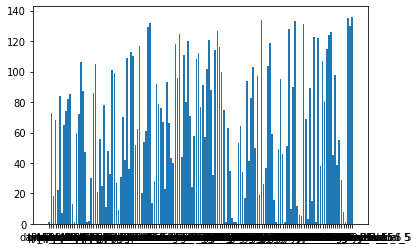

In [135]:
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot


rfe = RFE(RandomForestRegressor(n_estimators=500, random_state=1), n_features_to_select=10)
fit = rfe.fit(features_dataset_marcos, target_df.PMDA)
# report selected features
print('Selected Features:')
names = features_dataset_marcos.columns.values
for i in range(len(fit.support_)):
    if fit.support_[i]:
        print(names[i])
# plot feature rank
names = features_dataset_marcos.columns.values
ticks = [i for i in range(len(names))]

pyplot.bar(ticks, fit.ranking_)
pyplot.xticks(ticks, names)
pyplot.show()

In [148]:
selected_feature = names[fit.support_]

#### Modelos

In [150]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import numpy as np

In [151]:
#pd.plotting.scatter_matrix(dataset_marcos[['PMDA'] +  selected_feature], alpha=0.2, figsize  = [15, 15])

In [152]:
selected_feature

array(['day_50_mm', 'tmin_sd_5', 'prcp_log_5', 'ETreal_min_5', 'HS_max_5',
       'HS_mean_5', 'Palmer_min_5', 'day_10_mm_5', 'PDO_mean_5',
       'PDO_OND_min_5'], dtype=object)

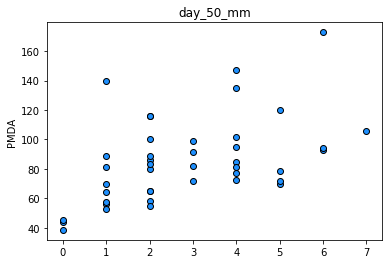

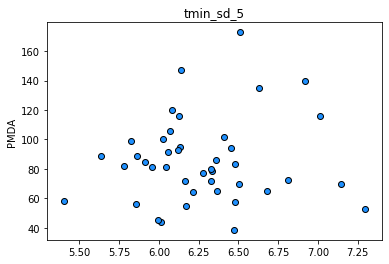

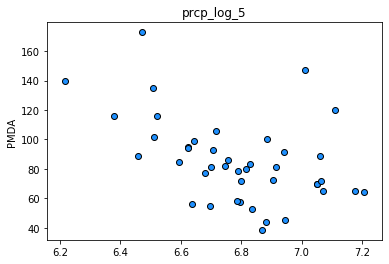

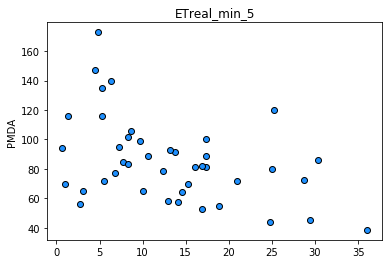

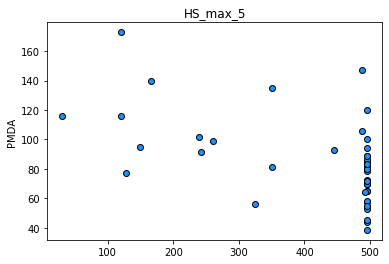

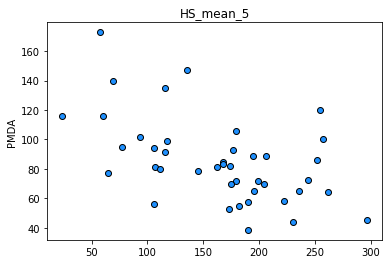

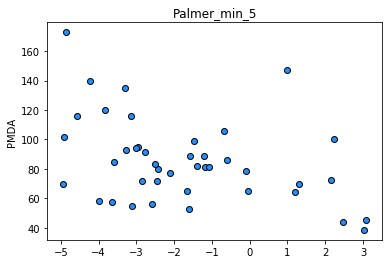

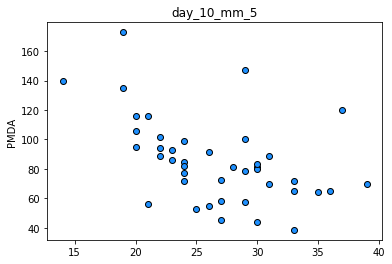

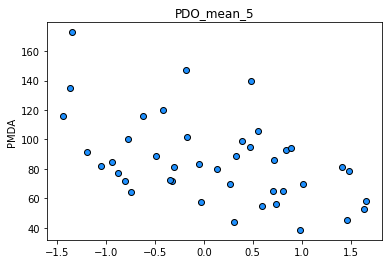

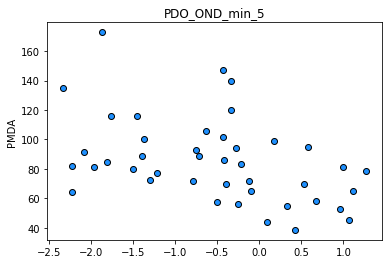

In [153]:
# Comente la parte de subplot porque no nos mostraba
# todos los gráficos

# fig = plt.figure(figsize=(30,20))
# fig.subplots_adjust(hspace=0.5, wspace=0.5)
# i = 1
for feature in selected_feature:
#      ax = fig.add_subplot(3, 5, i)
    plt.scatter(dataset_marcos.loc[:, feature], dataset_marcos['PMDA'], facecolor='dodgerblue', edgecolor='k', label='datos')
    plt.title(feature)
    plt.ylabel('PMDA')
#     i += 1
    plt.show()

In [154]:
X = dataset_marcos.copy()
y = dataset_marcos.PMDA

X_train = X[dataset_marcos.hydro_year < 2005].drop(['PMDA', 'omm_id'], axis = 1)
X_train = X_train[selected_feature]
y_train = dataset_marcos[dataset_marcos.hydro_year < 2005].PMDA

X_test = X[dataset_marcos.hydro_year > 2005].drop(['PMDA', 'omm_id'], axis = 1)
X_test = X_test[selected_feature]
y_test = dataset_marcos[dataset_marcos.hydro_year > 2005].PMDA

In [159]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
fitted_model = model.fit(X_train, y_train)

In [160]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

y_train_pred = fitted_model.predict(X_train)
y_test_pred = fitted_model.predict(X_test)

mae_tr = mean_absolute_error(y_train, y_train_pred)
mae_ts = mean_absolute_error(y_test, y_test_pred)

print(f'MAE: Train error: {mae_tr}')
print(f'MAE: Test error: {mae_ts}', '\n')

r2_tr = r2_score(y_train, y_train_pred)
r2_ts = r2_score(y_test, y_test_pred)

print(f'R2: Train error: {r2_tr}')
print(f'R2: Test error: {r2_ts}', '\n')

median_abs_error_tr = median_absolute_error(y_train, y_train_pred)
median_abs_error_ts = median_absolute_error(y_test, y_test_pred)

print(f'Median Absolute Error: Train error: {median_abs_error_tr}')
print(f'Median Absolute Error: Test error: {median_abs_error_ts}', '\n')

mean_sq_error_tr = mean_squared_error(y_train, y_train_pred)
mean_sq_error_ts = mean_squared_error(y_test, y_test_pred)

print(f'Median Absolute Error: Train error: {mean_sq_error_tr}')
print(f'Median Absolute Error: Test error: {mean_sq_error_ts}', '\n')

MAE: Train error: 13.914760901483838
MAE: Test error: 18.600320230358253 

R2: Train error: 0.6420822622869385
R2: Test error: 0.1848611901914997 

Median Absolute Error: Train error: 11.716161304773209
Median Absolute Error: Test error: 12.58182028733573 

Median Absolute Error: Train error: 307.92888662832337
Median Absolute Error: Test error: 582.1152480691297 



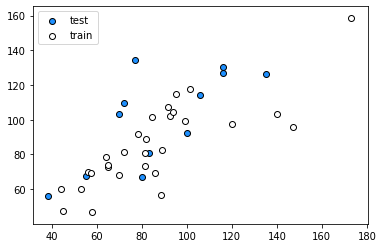

In [162]:


plt.scatter(y_test, y_test_pred, facecolor="dodgerblue", edgecolor="k", label="test")
plt.scatter(y_train, y_train_pred, facecolor="white", edgecolor="k", label="train")
#plt.plot(y, fitted_model.predict(X), color = 'red') 
#plt.plot(y_train, y_train_pred, color="tomato", label="modelo")
#plt.title(feature)
plt.legend()
plt.show()

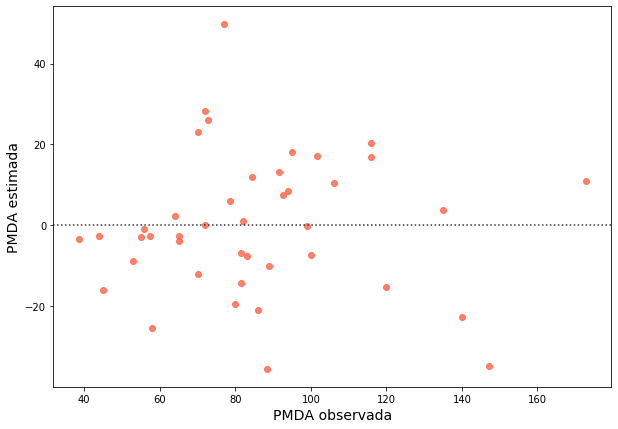

In [172]:
import seaborn as sns

df_prediction = {'y': y, 'y_pred': fitted_model.predict(X[selected_feature])}
df_prediction = pd.DataFrame(data=df_prediction)

fig = plt.figure(figsize = (10, 7))
sns.residplot(df_prediction.y, df_prediction.y_pred, color='tomato')

# title and labels
plt.xlabel('PMDA observada', size=14)
plt.ylabel('PMDA estimada', size=14);

### Regresión polinomial

In [176]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

train_errors = []
test_errors = []

degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9]

X = X_train
y = y_train

for degree in degrees:
    # train:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)





Min train error: 6.422394090826094e-25
Polinomio grado 2 

Min test error: 582.1152480691177
Polinomio grado 1 



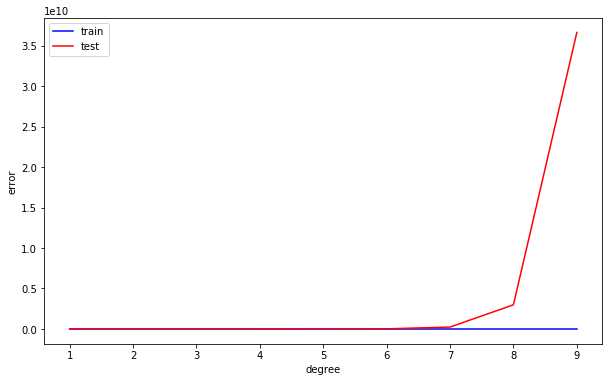

In [179]:
print(f'\nMin train error: {min(train_errors)}')
print('Polinomio grado ' + str(train_errors.index(min(train_errors))+1),"\n")
print(f'Min test error: {min(test_errors)}')
print('Polinomio grado ' + str(test_errors.index(min(test_errors))+1),"\n")

fig = plt.figure(figsize=(10,6))
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

In [143]:
X_train.shape

(33, 20)

## XGBoost

In [194]:
import xgboost
import csv as csv
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import  train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV   #Perforing grid search
from scipy.stats import skew
from collections import OrderedDict

In [195]:
X = dataset_marcos.copy()
y = dataset_marcos.PMDA

X_train = X[X.hydro_year < 2005].drop(['PMDA', 'omm_id'], axis = 1)
X_train = X_train[selected_feature]
y_train = X[X.hydro_year < 2005].PMDA

X_test = X[X.hydro_year > 2005].drop(['PMDA', 'omm_id'], axis = 1)
X_test = X_test[selected_feature]
y_test = X[X.hydro_year > 2005].PMDA

In [184]:
X_train.head()

,day_50_mm,PMDA_5,prcp_5,prcp_sd_5,prcp_mad_5,tmax_max_5,tmax_mean_5,tmax_sd_5,tmax_min_5,tmin_max_5,tmin_mean_5,tmin_min_5,tmin_sd_5,vmed_max_5,vmed_mean_5,vmed_min_5,vmed_sd_5,PMDA_log_5,prcp_log_5,prcp_standardized_5,prcp_normalized_5,tmed_max_5,tmed_mean_5,tmed_min_5,tmed_range_5,tmed_standardized_5,tmed_normalized_5,tmax_range_5,tmax_standardized_5,tmax_normalized_5,vmed_log_5,vmed_standardized_5,vmed_normalized_5,ETreal_max_5,ETreal_mean_5,prcp_warm_5,prcp_warm_sd_5,prcp_warm_mad_5,tmax_warm_max_5,tmax_warm_mean_5,tmax_warm_sd_5,tmax_warm_min_5,tmin_warm_max_5,tmin_warm_mean_5,tmin_warm_min_5,tmin_warm_sd_5,vmed_warm_max_5,vmed_warm_mean_5,vmed_warm_min_5,vmed_warm_sd_5,prcp_warm_log_5,prcp_warm_standardized_5,prcp_warm_normalized_5,prcp_warm_standardized_rolling_5,prcp_warm_normalized_rolling_5,prcp_warm_log_rolling_5,prcp_warm_rolling_5,tmed_warm_max_5,tmed_warm_mean_5,tmed_warm_min_5,tmed_warm_range_5,tmed_warm_standardized_5,tmed_warm_normalized_5,tmax_warm_range_5,tmax_warm_standardized_5,tmax_warm_normalized_5,tmax_warm_standardized_rolling_5,tmax_warm_normalized_rolling_5,tmax_warm_min_rolling_5,tmax_warm_max_rolling_5,tmax_warm_mean_rolling_5,tmax_warm_range_rolling_5,tmin_warm_range_5,tmin_warm_standardized_5,tmin_warm_normalized_5,tmin_warm_standardized_rolling_5,tmin_warm_normalized_rolling_5,tmin_warm_min_rolling_5,tmin_warm_max_rolling_5,tmin_warm_mean_rolling_5,tmin_warm_range_rolling_5,vmed_warm_log_5,vmed_warm_standardized_5,vmed_warm_normalized_5,ETreal_min_5,ETreal_sd_5,ETreal_mad_5,ETreal_sum_5,HS_max_5,HS_mean_5,HS_min_5,HS_sd_5,HS_mad_5,HS_sum_5,Radiacion_max_5,Radiacion_mean_5,Radiacion_min_5,Radiacion_sd_5,Radiacion_mad_5,Radiacion_sum_5,Presion_max_5,Presion_mean_5,Presion_min_5,Presion_sd_5,Presion_mad_5,Presion_sum_5,Palmer_max_5,Palmer_mean_5,Palmer_min_5,Palmer_sd_5,Palmer_mad_5,Palmer_sum_5,day_10_mm_5,day_20_mm_5,day_50_mm_5,day_90_5,day_95_5,day_99_5,SOI_mean_5,SOI_max_5,SOI_min_5,ONI_mean_5,ONI_max_5,ONI_min_5,Nino_3_4_mean_5,Nino_3_4_max_5,Nino_3_4_min_5,PDO_mean_5,PDO_max_5,PDO_min_5,SOI_OND_mean_5,SOI_OND_max_5,SOI_OND_min_5,ONI_OND_mean_5,ONI_OND_max_5,ONI_OND_min_5,Nino_3_4_OND_mean_5,Nino_3_4_OND_max_5,Nino_3_4_OND_min_5,PDO_OND_mean_5,PDO_OND_max_5,PDO_OND_min_5,type_category_Cold_5,type_category_Neutral_5,type_category_Warm_5
25,6,50.5,646.0,6.599019,3.027343,41.3,24.981967,7.028541,7.7,27.2,11.032240,-9.2,6.511133,13.333333,2.827869,0.277778,2.186552,3.921973,6.470800,-1.147807,0.231604,34.25,18.007104,-0.75,35.00,1.098664,0.827061,33.6,1.413992,0.794487,1.039523,-0.689244,0.471411,104.7,51.150000,437.7,7.752129,3.990840,41.3,28.803297,6.069768,13.2,27.2,14.181868,-0.8,5.304220,13.333333,3.124237,0.277778,2.413665,6.081534,-1.125949,0.352901,-0.575824,0.441247,6.275324,540.04,34.25,21.492582,6.20,28.05,1.320463,0.920165,28.1,1.709718,0.897493,28.015713,28.015713,28.015713,28.015713,28.015713,28.015713,28.0,0.962453,0.823755,13.879739,13.879739,13.879739,13.879739,13.879739,13.879739,1.139190,-0.540439,0.507344,4.8,28.382789,20.733333,613.8,120.0,57.416667,31.0,27.773298,21.388889,689.0,293.2,197.516667,98.9,74.531297,63.366667,2370.2,21.34,14.680833,8.76,4.438264,3.762639,176.17,1.09,-1.823333,-4.87,2.210773,1.932778,-21.88,19.0,12.0,1.0,5.0,2.0,0.0,0.908333,2.8,-2.6,-0.480000,0.67,-0.96,26.318333,28.32,25.37,-1.346667,0.21,-2.20,1.366667,2.8,0.4,-0.903333,-0.85,-0.96,25.466667,25.56,25.37,-1.113333,-0.22,-1.87,1.0,0.0,0.0
27,5,100.0,1227.0,11.518805,5.578262,37.0,22.652055,6.333339,8.2,24.8,11.293151,-6.5,6.081243,11.944444,2.442922,0.277778,1.960058,4.605170,7.112327,1.278643,0.643485,30.90,16.972603,0.85,30.05,0.634252,0.714166,28.8,0.232388,0.545055,0.893195,-1.031416,0.372831,130.5,86.508333,735.3,10.584119,6.463423,37.0,25.945856,5.205483,13.5,24.8,13.423204,-2.0,5.326403,11.944444,2.631983,0.555556,2.151372,6.600279,0.473788,0.609807,-0.468638,0.458460,6.304466,559.98,30.90,19.684530,5.75,25.15,0.480355,0.663251,23.5,0.236510,0.518976,27.500279,27.500279,27.500279,27.500279

In [196]:
model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

In [198]:
#every_column_except_y= [col for col in train_dataset.columns if col not in ['SalePrice','Id']]
model.fit(X[features_columns], y)

#OrderedDict(sorted(model.booster().get_fscore().items(), key=lambda t: t[1], reverse=True))

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.07, max_delta_step=0, max_depth=3,
             min_child_weight=1.5, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0.75, reg_lambda=0.45, scale_pos_weight=1, seed=42,
             subsample=0.6, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [201]:
model.booster

AttributeError: 'NoneType' object has no attribute 'get_fscore'

In [202]:
train_x = X_train
train_y = y_train

#for tuning parameters
parameters_for_testing = {
    'colsample_bytree':[0.4,0.6,0.8],
    'gamma':[0,0.03,0.1,0.3],
    'min_child_weight':[1.5,6,10],
    'learning_rate':[0.1,0.07],
    'max_depth':[3,5],
    'n_estimators':[10000],
    'reg_alpha':[1e-5, 1e-2,  0.75],
    'reg_lambda':[1e-5, 1e-2, 0.45],
    'subsample':[0.6,0.95]  
}

                    
xgb_model = xgboost.XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,
     min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1, seed=27)

gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='neg_mean_squared_error')
gsearch1.fit(train_x,train_y)
print (gsearch1.grid_scores_)
print('best params')
print (gsearch1.best_params_)
print('best score')
print (gsearch1.best_score_)


Fitting 5 folds for each of 2592 candidates, totalling 12960 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:   16.3s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:   16.9s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:   44.1s
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:   58.0s
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done  49 tasks      | elapsed:  2.4min
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed:  2.7min
[Parallel(n_jobs=6)]: Done  73 tasks      | elapsed:  3.4min
[Parallel(n_jobs=6)]: Done  86 tasks      | elapsed:  3.9min
[Parallel(n_jobs=6)]: Done 101 tasks      | elapsed:  4.6min
[Parallel(n_jobs=6)]: Done 116 tasks      | elapsed:  5.5min
[Parallel(n_jobs=6)]: Done 133 tasks      | elapsed:  6.4min
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:  7.1min
[Parallel(n_jobs=6)]: Done 169 tasks      | elapsed:  8.1min
[Parallel(

KeyboardInterrupt: 

In [204]:

best_xgb_model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
best_xgb_model.fit(train_x,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.07, max_delta_step=0, max_depth=3,
             min_child_weight=1.5, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0.75, reg_lambda=0.45, scale_pos_weight=1, seed=42,
             subsample=0.6, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [205]:
y_train_pred = best_xgb_model.predict(X_train)
y_test_pred = best_xgb_model.predict(X_test)

mae_tr = mean_absolute_error(y_train, y_train_pred)
mae_ts = mean_absolute_error(y_test, y_test_pred)

print(f'MAE: Train error: {mae_tr}')
print(f'MAE: Test error: {mae_ts}', '\n')

r2_tr = r2_score(y_train, y_train_pred)
r2_ts = r2_score(y_test, y_test_pred)

print(f'R2: Train error: {r2_tr}')
print(f'R2: Test error: {r2_ts}', '\n')

median_abs_error_tr = median_absolute_error(y_train, y_train_pred)
median_abs_error_ts = median_absolute_error(y_test, y_test_pred)

print(f'Median Absolute Error: Train error: {median_abs_error_tr}')
print(f'Median Absolute Error: Test error: {median_abs_error_ts}', '\n')

mean_sq_error_tr = mean_squared_error(y_train, y_train_pred)
mean_sq_error_ts = mean_squared_error(y_test, y_test_pred)

print(f'Median Absolute Error: Train error: {mean_sq_error_tr}')
print(f'Median Absolute Error: Test error: {mean_sq_error_ts}', '\n')

MAE: Train error: 0.07329840824521826
MAE: Test error: 21.438292185465496 

R2: Train error: 0.999982307291921
R2: Test error: -0.009432849645945485 

Median Absolute Error: Train error: 0.0369720458984375
Median Absolute Error: Test error: 17.16984748840332 

Median Absolute Error: Train error: 0.015221642646236308
Median Absolute Error: Test error: 720.8664912161694 



In [203]:
from pygam import GAM, s, f
from pygam.datasets import wage


## model
gam = GAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7)).fit(X_train, y_train)
gam.summary()
#gam.gridsearch(X_train, y_train)

GAM                                                                                                       
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      3.5907
Link Function:                     IdentityLink Log Likelihood:                                  -223.4964
Number of Samples:                           29 AIC:                                              456.1743
                                                AICc:                                              458.367
                                                GCV:                                             1136.7113
                                                Scale:                                            886.5526
                                                Pseudo R-Squared:                                   0.0971
Feature Function                  Lam

/Users/alessiobocco/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  import sys


AttributeError: 'GAM' object has no attribute 'prediction_intervals'

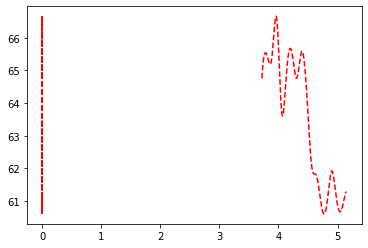

In [150]:
XX = gam.generate_X_grid(term=0, n=500)

plt.plot(XX, gam.predict(XX), 'r--')
plt.plot(XX, gam.prediction_intervals(XX, width=.95), color='b', ls='--')

#plt.scatter(X, y, facecolor='gray', edgecolors='none')
plt.title('95% prediction interval');